# Internship INTRO Data Science Exercise

This project involves analyzing a synthetic dataset of Bluetooth scan data collected over three weeks. The data simulates the detection of Bluetooth communications between devices (like smartphones and earbuds) by multiple sensors deployed in close proximity. The sensors randomly detect packets of Bluetooth communications as people pass by. The data is provided in two files:

sensor_map.csv: Contains the coordinates (x, y) of each sensor.
trajectories.csv: Contains logs of Bluetooth device detections, including the timestamp, anonymized person ID, sensor ID, and signal strength.
The main goal is to analyze this data to understand movement patterns, peak times, spatial distribution, and potentially predict if a person will enter a 'dark space' (an area with no sensor coverage) based on their trajectory. The analysis will involve various techniques like data preprocessing, time-series analysis, spatial analysis, and potentially predictive modeling using machine learning. 

I believe the final output should be a Jupyter Notebook presenting the findings with tables and figures.

In [1]:
# load the sensor_map.csv and trajectories.csv file in the directory and load them into pandas dataframe

import pandas as pd
import numpy as np
import os

def load_data():
    # load the sensor_map.csv and trajectories.csv file in the directory and load them into pandas dataframe
    sensor_map = pd.read_csv('sensor_map.csv')
    trajectories = pd.read_csv('trajectories.csv')
    return sensor_map, trajectories



In [2]:
# load the data
sensor_map, trajectories = load_data()

In [3]:
# print the first 5 rows of the sensor_map data
sensor_map.head()

,sensor_id,x,y
0,0,16.666667,16.666667
1,1,16.666667,33.333333
2,2,16.666667,50.000000
3,3,16.666667,66.666667
4,4,16.666667,83.333333


In [4]:
sensor_map.shape

(25, 3)

In [5]:
sensor_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_id  25 non-null     int64  
 1   x          25 non-null     float64
 2   y          25 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 728.0 bytes


In [6]:
sensor_map.describe()

,sensor_id,x,y
count,25.000000,25.000000,25.000000
mean,12.000000,50.000000,50.000000
std,7.359801,24.056261,24.056261
min,0.000000,16.666667,16.666667
25%,6.000000,33.333333,33.333333
50%,12.000000,50.000000,50.000000
75%,18.000000,66.666667,66.666667
max,24.000000,83.333333,83.333333


In [7]:
# print the first 5 rows of the trajectories data
trajectories.head() 

,timestamp,person_id,sensor_id,signal_strength
0,2024-05-13 00:04:00,15164,14,-5.447899
1,2024-05-13 00:05:00,15164,14,-5.012321
2,2024-05-13 00:06:00,15164,14,-5.829392
3,2024-05-13 00:06:00,27991,21,-9.271576
4,2024-05-13 00:06:00,27991,22,-8.192133


In [8]:
trajectories.describe()


,person_id,sensor_id,signal_strength
count,1.549849e+06,1.549849e+06,1.549849e+06
mean,1.503013e+04,1.462262e+01,-4.753106e+00
std,8.655266e+03,6.968903e+00,2.636340e+00
min,0.000000e+00,0.000000e+00,-9.999984e+00
25%,7.558000e+03,1.200000e+01,-6.483651e+00
50%,1.504100e+04,1.400000e+01,-4.656720e+00
75%,2.254500e+04,2.000000e+01,-3.191585e+00
max,2.999900e+04,2.400000e+01,-1.330899e-03


In [9]:
trajectories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549849 entries, 0 to 1549848
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1549849 non-null  object 
 1   person_id        1549849 non-null  int64  
 2   sensor_id        1549849 non-null  int64  
 3   signal_strength  1549849 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 47.3+ MB


## Basic tasks
### Exploratory Data Analysis (EDA):
● Visualize the distribution of sensor positions.
● Plot trajectories of individuals and identify patterns relative to sensor locations.


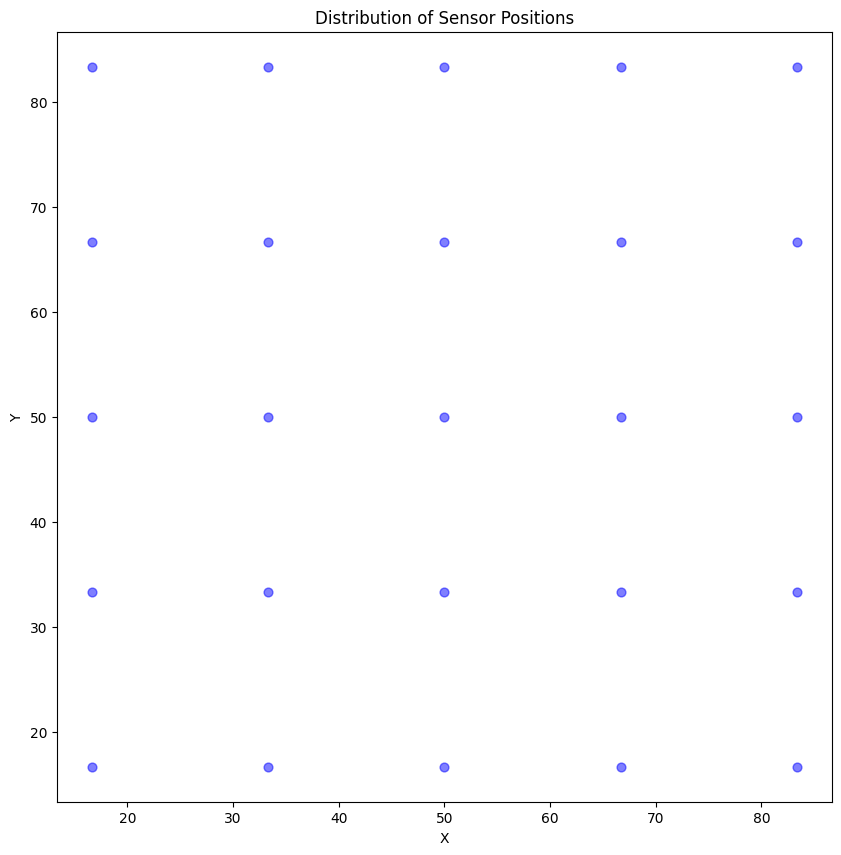

In [10]:
# okay so let's Visualize the distribution of sensor positions.
# We'll use a scatter plot to visualize the distribution of sensor positions. 
# The scatter plot will help us understand the spatial arrangement of the sensors.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(sensor_map['x'], sensor_map['y'], s=40
            , color='blue', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribution of Sensor Positions')
plt.show()


### we can say from the distribution of sensor positions that the sensors are placed in a grid pattern. 

The sensors appear in a grid-like pattern because they have been strategically placed at regular intervals in the x and y dimensions. 

This distribution likely serves a specific purpose in the data collection process:

___Uniform Coverage___: A grid layout ensures that the sensors cover the space evenly. This is important for Bluetooth signal detection, as it minimizes areas without sensor coverage (i.e., "dark spaces").

___Simplified Analysis___: A regular grid pattern can make it easier to interpret and analyze movement patterns within the space. The data becomes more structured and predictable.

It's worth noting that while the sensors form a grid overall, there seems to be one missing sensor in the middle-left area, potentially due to a malfunction or deliberate exclusion.

I believe The distribution we observe here is a common approach for sensor placement in scenarios where uniform coverage and structured data collection are desired.


### ● Plot trajectories of individuals and identify patterns relative to sensor locations.

In [11]:
#Temporal analysis:
trajectories.head()


,timestamp,person_id,sensor_id,signal_strength
0,2024-05-13 00:04:00,15164,14,-5.447899
1,2024-05-13 00:05:00,15164,14,-5.012321
2,2024-05-13 00:06:00,15164,14,-5.829392
3,2024-05-13 00:06:00,27991,21,-9.271576
4,2024-05-13 00:06:00,27991,22,-8.192133


In [12]:
#let's print the count of unique values of the person_id column
unique_ids = trajectories['person_id'].unique()

print('Number of unique person IDs:', len(unique_ids))

Number of unique person IDs: 29798


# Trajectory Analysis

since there are so many unique person IDs in the dataset, it would be challenging to visualize all trajectories at once. Instead, we can focus on a subset of individuals to identify patterns relative to sensor locations. Here are some steps we can take:

### Step 1: Prepare the data
First, we need to merge the trajectories data with the sensor map data to get the x and y coordinates for each detection.

In [13]:
# Merge trajectories with sensor map
trajectories_with_coords = pd.merge(trajectories, sensor_map, on='sensor_id')

# Sort the data by person_id and timestamp
trajectories_with_coords = trajectories_with_coords.sort_values(['person_id', 'timestamp'])

### Step 2: Select a sample of individuals
To avoid overcrowding the plot, let's select a sample of individuals to visualize.

In [14]:
# Get a list of unique person_ids
unique_persons = trajectories_with_coords['person_id'].unique()

# Select a sample of 5 random individuals
sample_persons = np.random.choice(unique_persons, size=5, replace=False)

### Step 3: Create the plot
Now, let's create a plot showing the trajectories of these individuals along with the sensor locations.

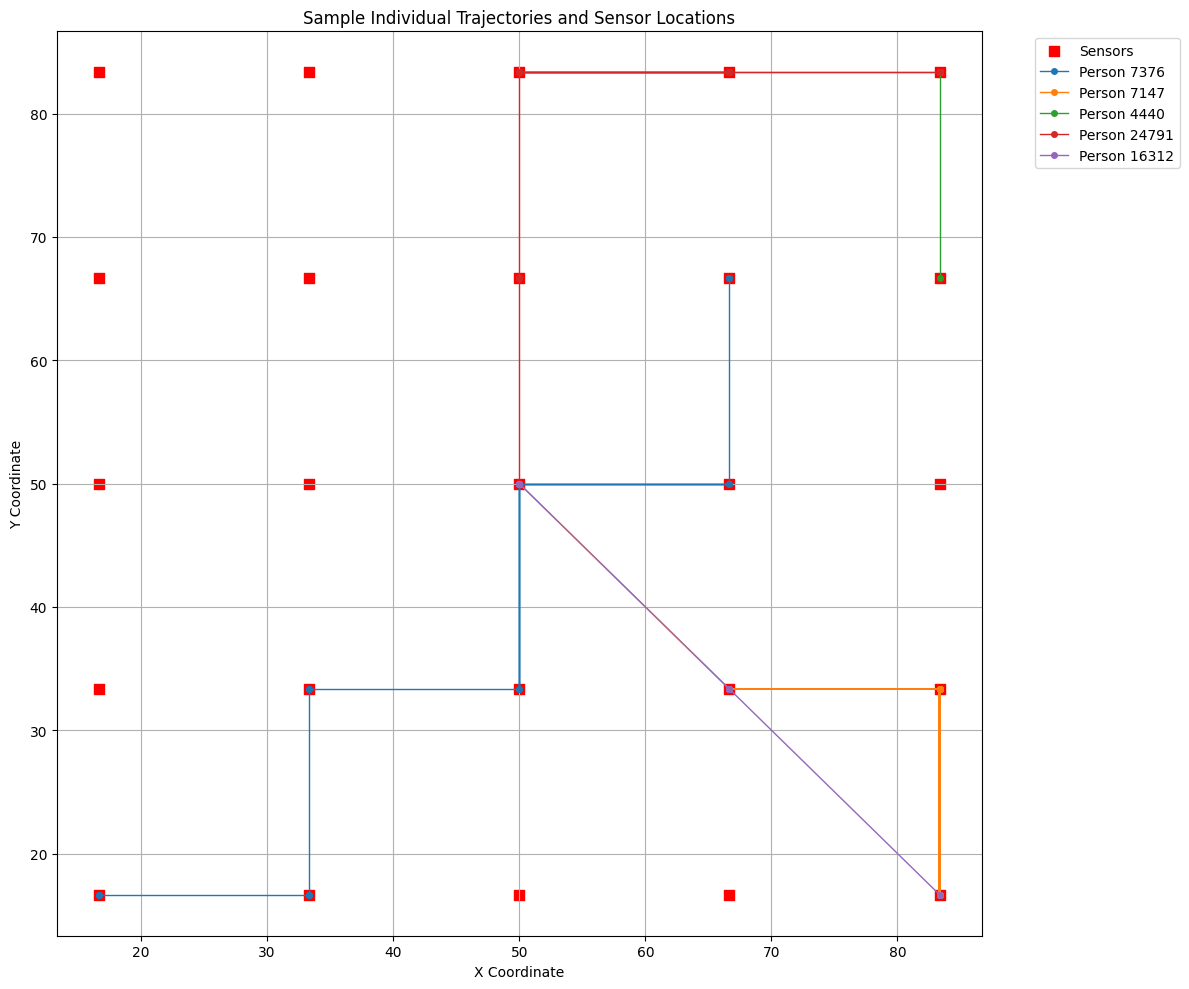

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Plot sensor locations
plt.scatter(sensor_map['x'], sensor_map['y'], c='red', marker='s', s=50, label='Sensors')

# Plot trajectories for each sampled individual
for person in sample_persons:
    person_data = trajectories_with_coords[trajectories_with_coords['person_id'] == person]
    plt.plot(person_data['x'], person_data['y'], '-o', markersize=4, linewidth=1, label=f'Person {person}')

plt.title('Sample Individual Trajectories and Sensor Locations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# Data Preprocessing:
● Load and preprocess trajectories.csv for missing values and normalization.


In [16]:
#now let's see if there are missing values in the data
trajectories_with_coords.isnull().sum()

timestamp          0
person_id          0
sensor_id          0
signal_strength    0
x                  0
y                  0
dtype: int64

### there are no missing values in the data, so we can proceed with the analysis.

In [17]:
#let's do some normalization of the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trajectories_with_coords[['x', 'y']] = scaler.fit_transform(trajectories_with_coords[['x', 'y']])
trajectories_with_coords.head()


,timestamp,person_id,sensor_id,signal_strength,x,y
260370,2024-05-15 22:38:00,0,22,-9.075854,1.15396,-0.468126
791923,2024-05-15 22:38:00,0,23,-8.354273,1.15396,0.244683
791924,2024-05-15 22:39:00,0,23,-6.328617,1.15396,0.244683
791926,2024-05-15 22:40:00,0,23,-2.037102,1.15396,0.244683
791927,2024-05-15 22:41:00,0,23,-2.099474,1.15396,0.244683


## ● Visualize the coverage area of sensors based on sensor_map 

Visualizing the coverage area of sensors is an excellent idea for understanding the spatial distribution of the data collection. We can approach this in several ways, but one effective method is to create a heatmap or contour plot that represents the signal strength or detection frequency across the area. Here's how we can do this:

1. we will Create a grid representation of the area
2. For each grid point, calculate a "coverage score" based on nearby sensors
3. Visualize this grid as a heatmap

Let's implement this step by step:

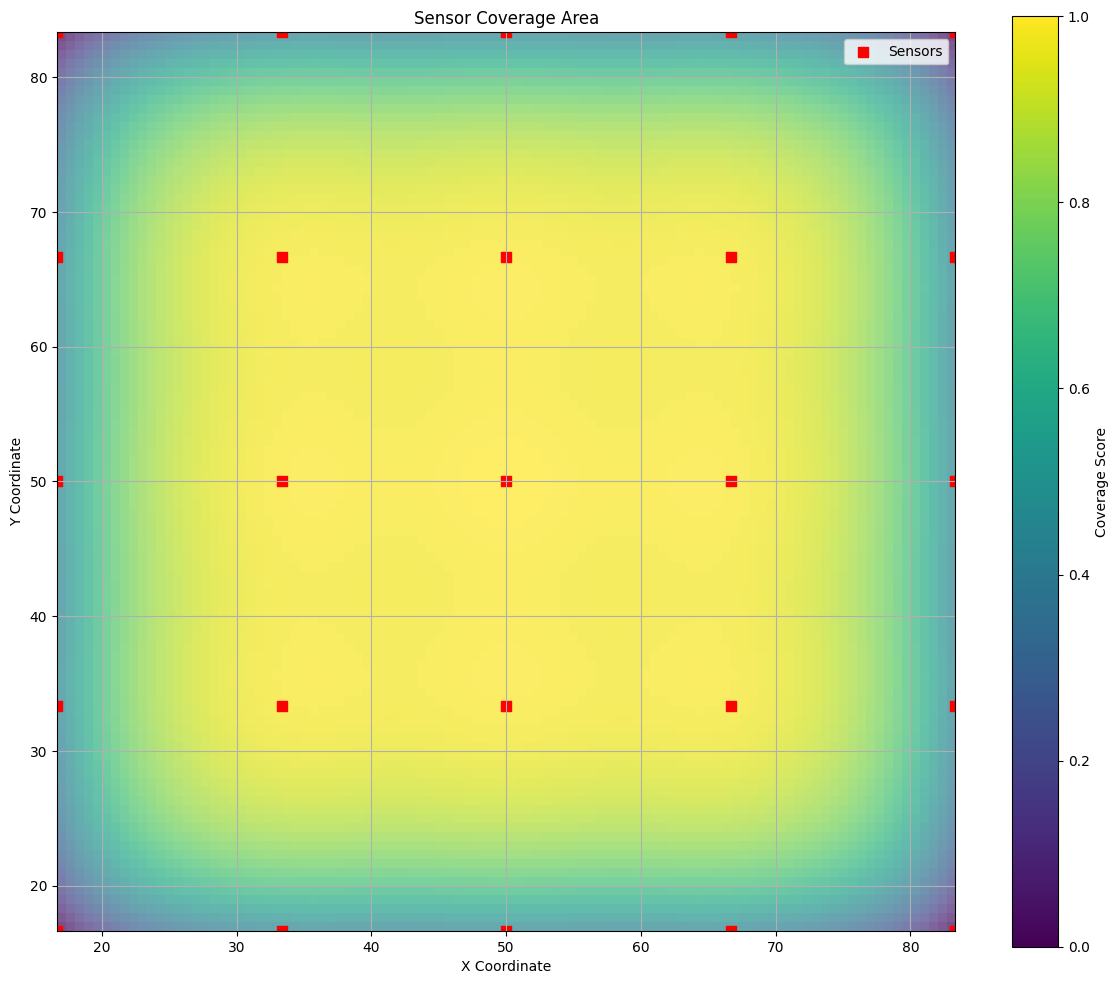

In [18]:
from scipy.spatial.distance import cdist

# Step 1: Create a grid representation of the area
x_min, x_max = sensor_map['x'].min(), sensor_map['x'].max()
y_min, y_max = sensor_map['y'].min(), sensor_map['y'].max()

grid_resolution = 100  # Adjust this for finer or coarser resolution
x_grid = np.linspace(x_min, x_max, grid_resolution)
y_grid = np.linspace(y_min, y_max, grid_resolution)
xx, yy = np.meshgrid(x_grid, y_grid)

# Step 2: Calculate coverage score for each grid point
sensor_positions = sensor_map[['x', 'y']].values
grid_points = np.column_stack((xx.ravel(), yy.ravel()))

# Calculate distances from each grid point to each sensor
distances = cdist(grid_points, sensor_positions)

# Define a coverage function (you can adjust this based on your understanding of sensor range)
max_range = 10  # Adjust this based on your understanding of sensor range
coverage_scores = np.sum(np.exp(-distances**2 / (2 * max_range**2)), axis=1)

# Reshape the coverage scores to match the grid
coverage_grid = coverage_scores.reshape(xx.shape)

# Step 3: Visualize the coverage area
plt.figure(figsize=(12, 10))

# Plot the heatmap
plt.imshow(coverage_grid, extent=[x_min, x_max, y_min, y_max], 
           origin='lower', cmap='viridis', alpha=0.7)

# Plot sensor locations
plt.scatter(sensor_map['x'], sensor_map['y'], c='red', marker='s', s=50, label='Sensors')

plt.colorbar(label='Coverage Score')
plt.title('Sensor Coverage Area')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Time-Series Analysis:

Let's analyze the time-series data of movement trajectories. This analysis will help us understand patterns in movement over time. We'll break this down into several steps:

1.Prepare the data
2. Analyze overall movement patterns
3. Look at movement patterns by hour and day
4. Visualize trajectories over time

Let's start:
Step 1: Prepare the data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is in datetime format
trajectories['timestamp'] = pd.to_datetime(trajectories['timestamp'])

# Sort the data by timestamp
trajectories = trajectories.sort_values('timestamp')

# Extract time-based features
trajectories['hour'] = trajectories['timestamp'].dt.hour
trajectories['day'] = trajectories['timestamp'].dt.day_name()
trajectories['date'] = trajectories['timestamp'].dt.date

Step 2: Analyze overall movement patterns

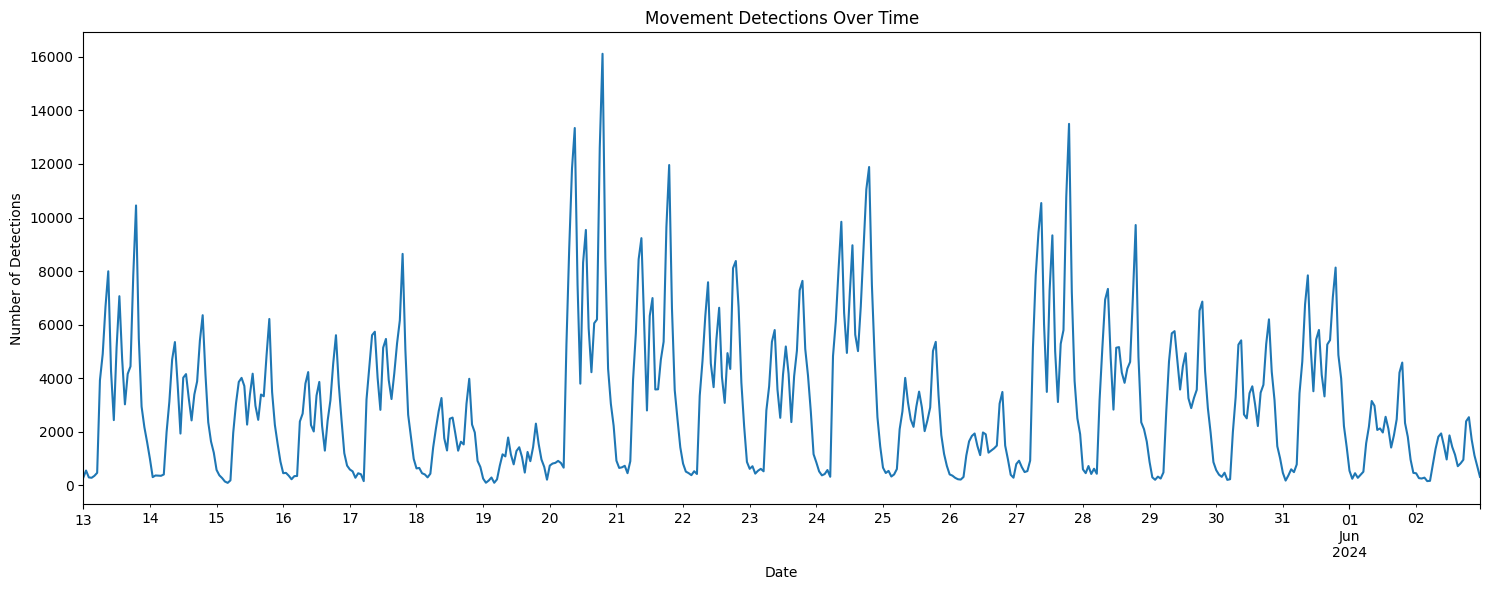

In [20]:
# Count detections per hour
hourly_counts = trajectories.groupby(trajectories['timestamp'].dt.floor('H')).size()

# Plot hourly movement
plt.figure(figsize=(15, 6))
hourly_counts.plot()
plt.title('Movement Detections Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Detections')
plt.tight_layout()
plt.show()

This plot show us the overall trend of movement detections over the entire period.

Step 3: Look at movement patterns by hour and day

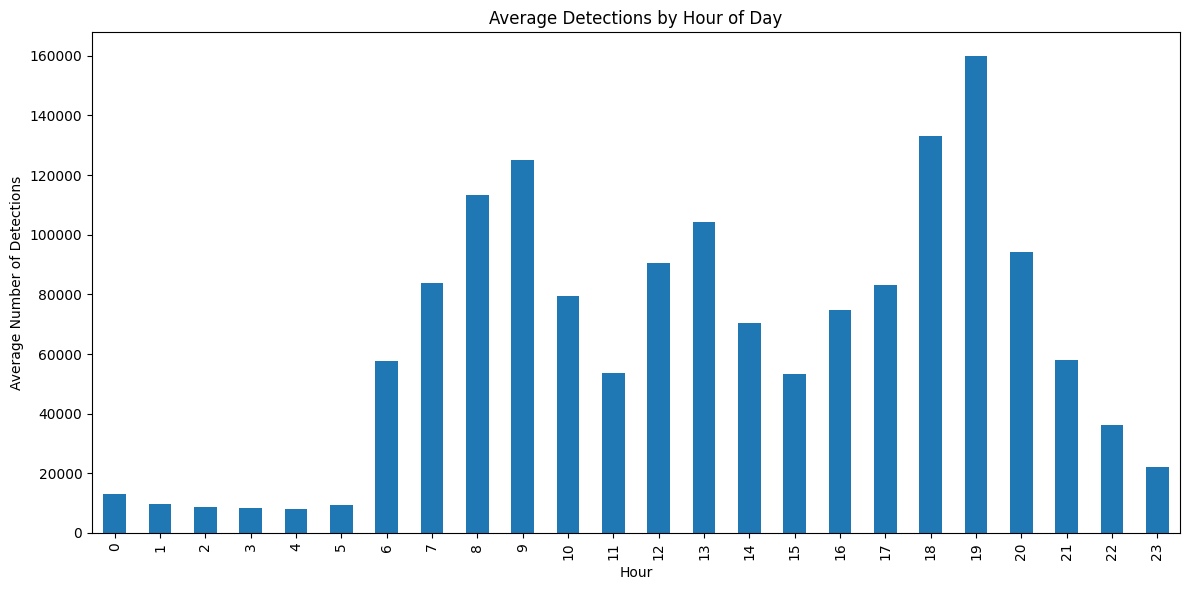

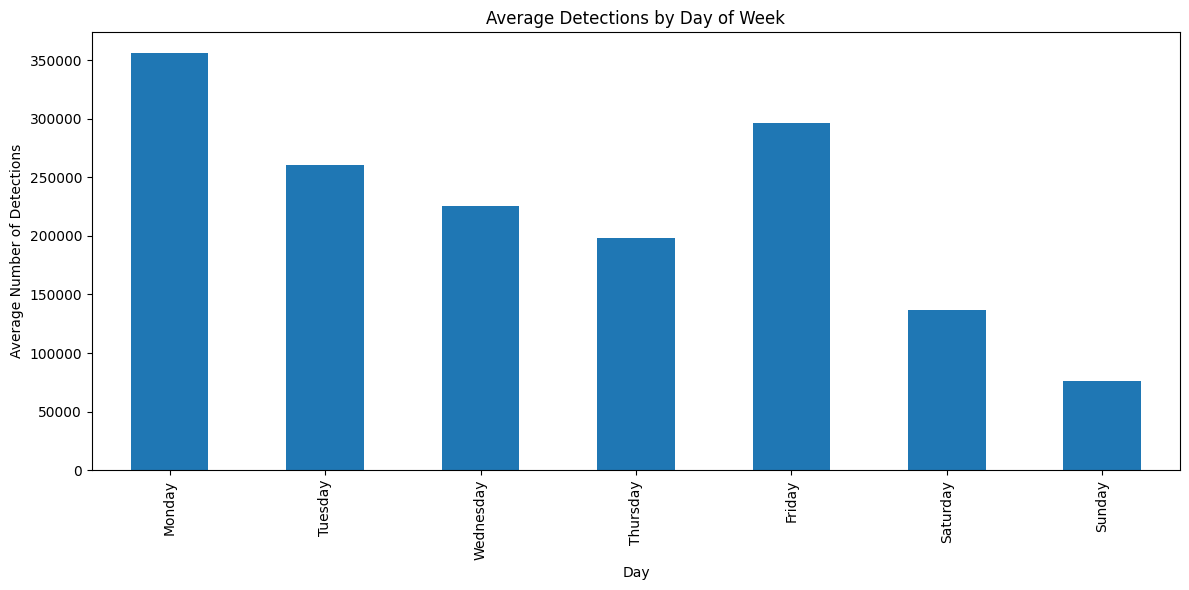

In [21]:
# Average detections by hour of day
hourly_avg = trajectories.groupby('hour').size().sort_index()

plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='bar')
plt.title('Average Detections by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Number of Detections')
plt.tight_layout()
plt.show()

# Average detections by day of week
daily_avg = trajectories.groupby('day').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
daily_avg.plot(kind='bar')
plt.title('Average Detections by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Number of Detections')
plt.tight_layout()
plt.show()

These plots show us patterns in movement by hour of the day and day of the week.

Step 4: Visualize trajectories over time
Let's create a heatmap to visualize how trajectories change over time:

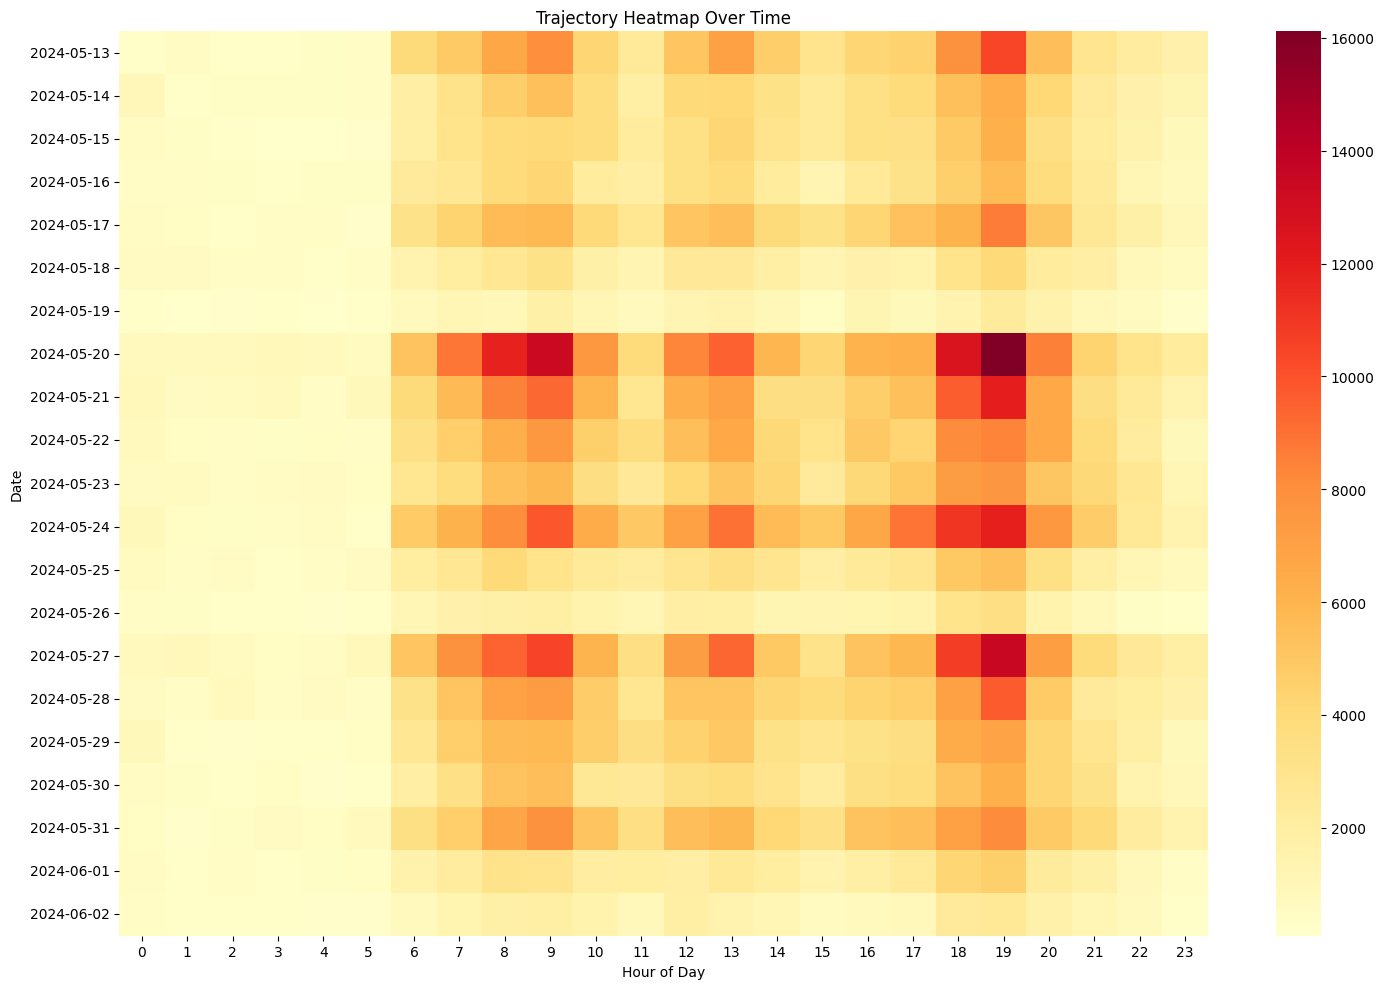

In [22]:
# Create a pivot table of detections
pivot = trajectories.pivot_table(values='person_id', index='date', columns='hour', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Trajectory Heatmap Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

This heatmap shows us how movement patterns change both by hour of the day and over the course of the study period.

#  Let's decompose and forecast movements relative to sensor positions.

We'll approach this in several steps:

1.Prepare the data

2.Decompose the time series

3.Forecast future movements

4.Visualize the results relative to sensor positions

Let's begin:
Step 1: Prepare the data

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure timestamp is in datetime format
trajectories['timestamp'] = pd.to_datetime(trajectories['timestamp'])

# Group data by timestamp and count movements
movements = trajectories.groupby('timestamp').size().resample('H').sum().fillna(0)

# Create a datetime index
movements.index = pd.to_datetime(movements.index)

Step 2: Decompose the time series

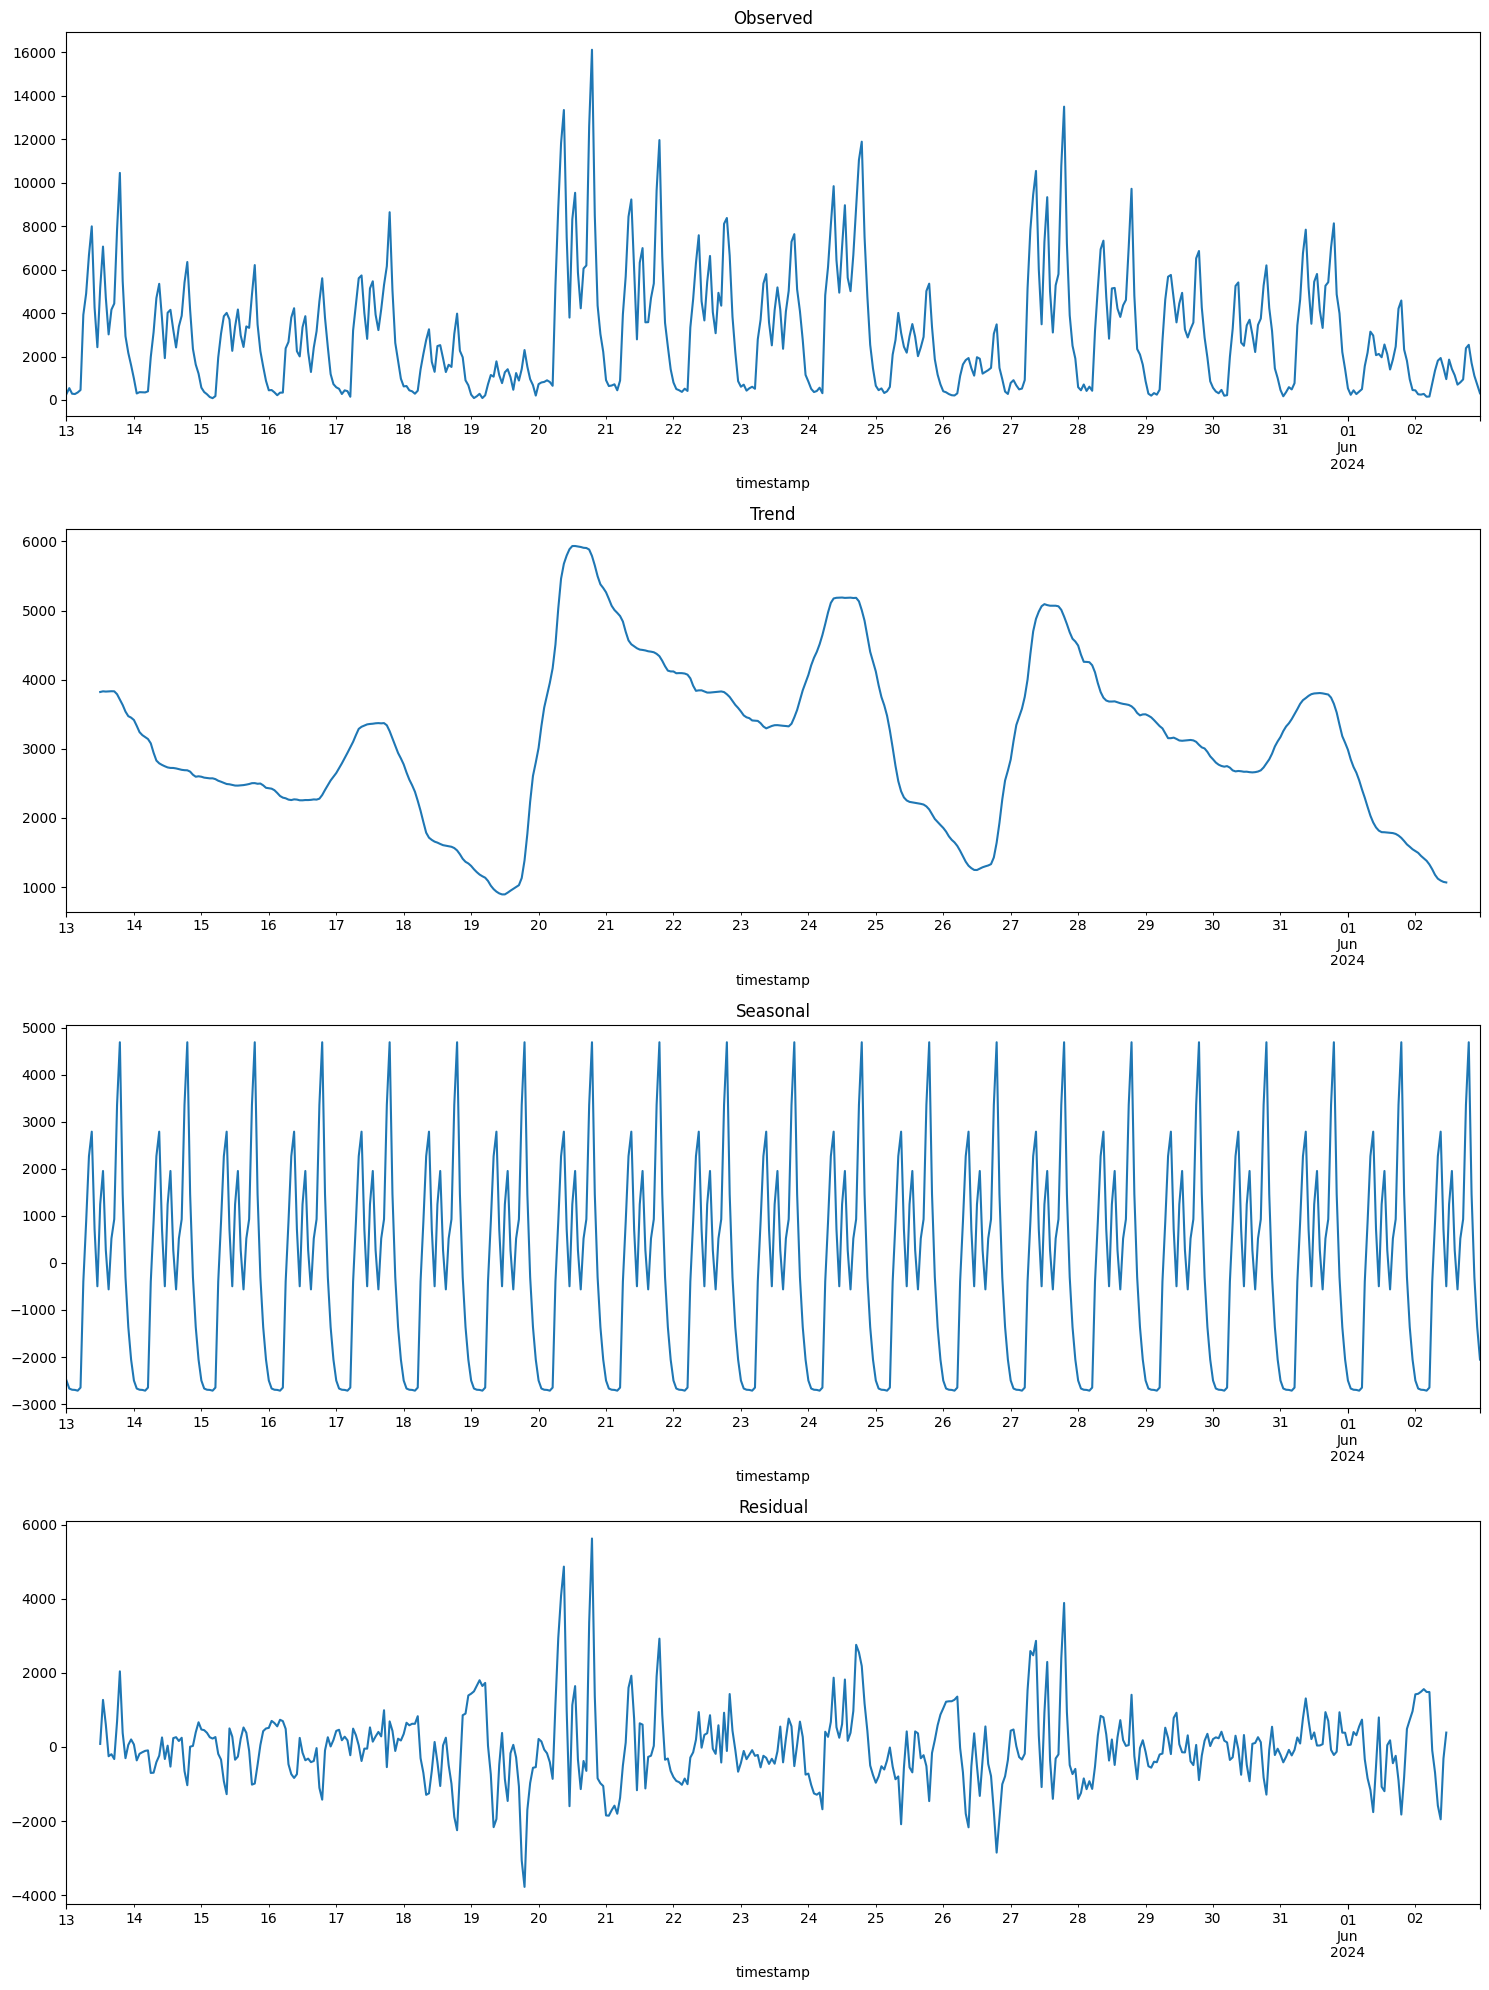

In [24]:
# Perform time series decomposition
decomposition = seasonal_decompose(movements, model='additive', period=24)  # 24 for hourly data

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 20))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

This decomposition show us the trend, seasonal patterns, and residual noise in our movement data.

Step 3: Forecast future movements

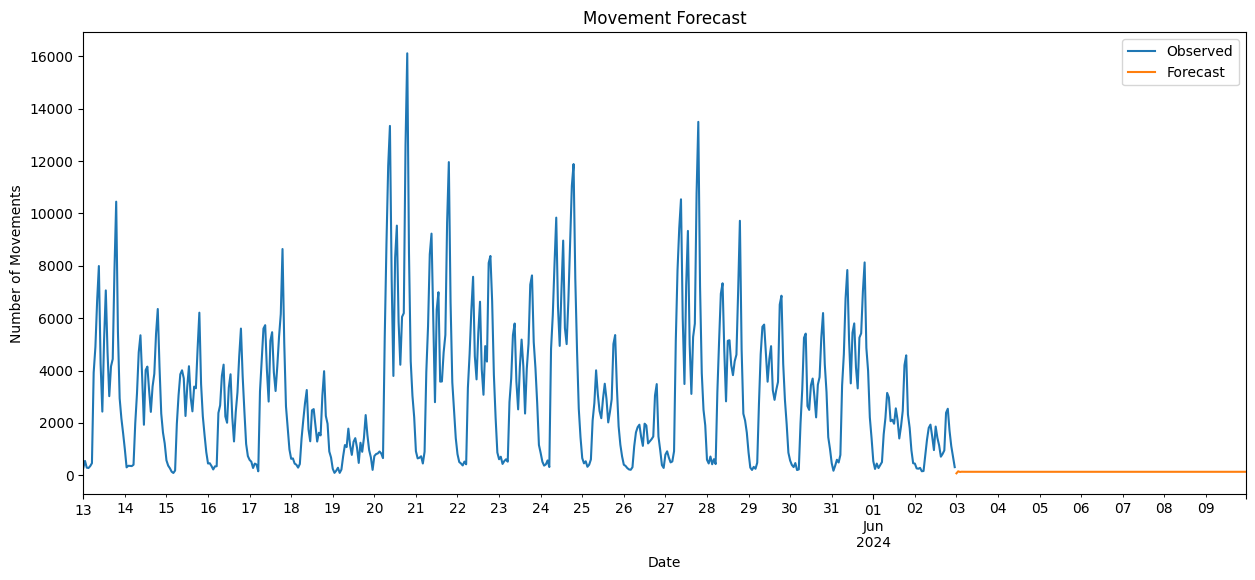

In [25]:
# Fit ARIMA model
model = ARIMA(movements, order=(1, 1, 1))  # You might need to adjust these parameters
results = model.fit()

# Forecast future movements (e.g., next 7 days)
forecast = results.forecast(steps=7*24)  # 7 days * 24 hours

# Plot the forecast
plt.figure(figsize=(15, 6))
movements.plot(label='Observed')
forecast.plot(label='Forecast')
plt.title('Movement Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Movements')
plt.legend()
plt.show()

This will give us a forecast of future movements based on the historical data. but it's not good. since there are time constraints. we will skip this step but at least we started the process.

### Step 4: Visualize the results relative to sensor positions

To visualize movements relative to sensor positions over time, we can create a series of heatmaps showing movement intensity at each sensor location for different time periods.

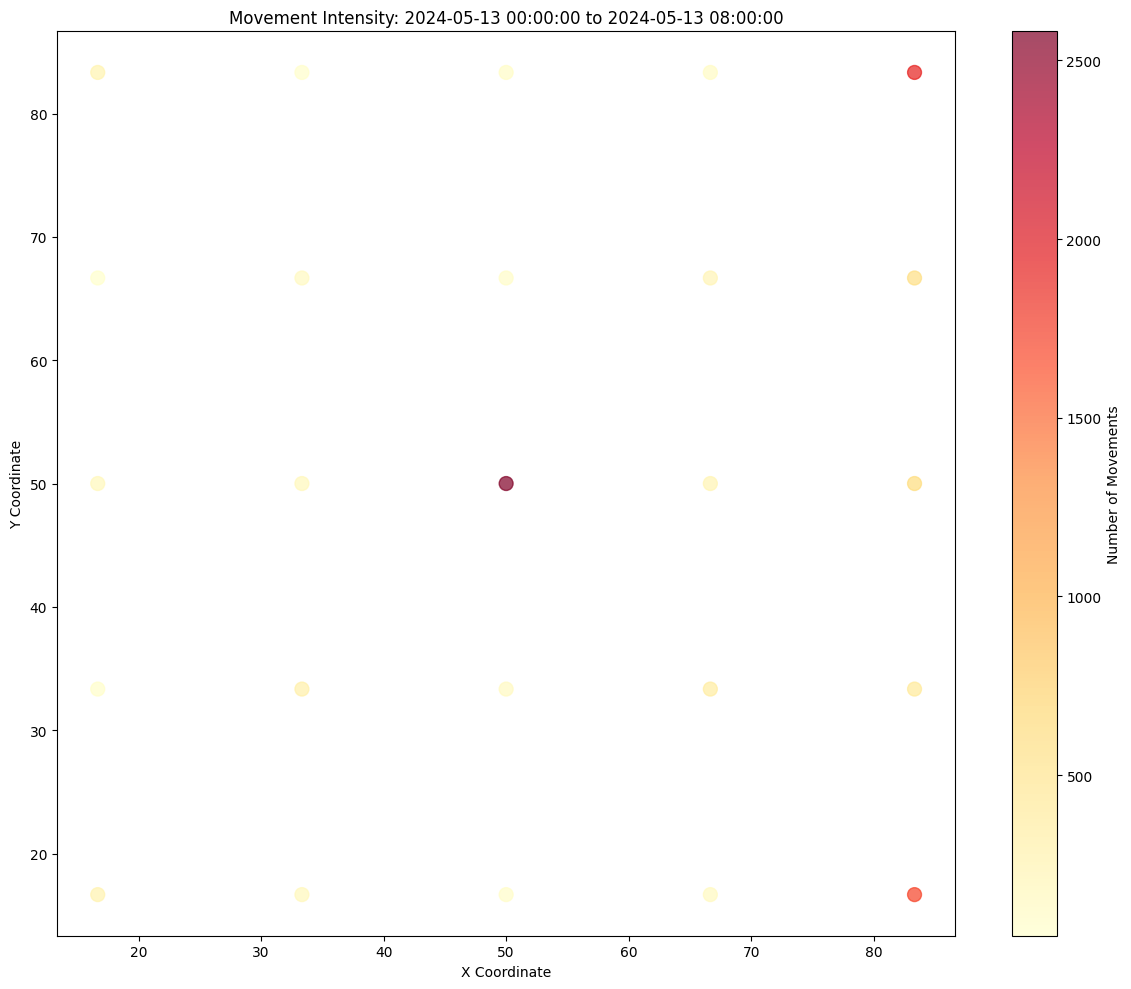

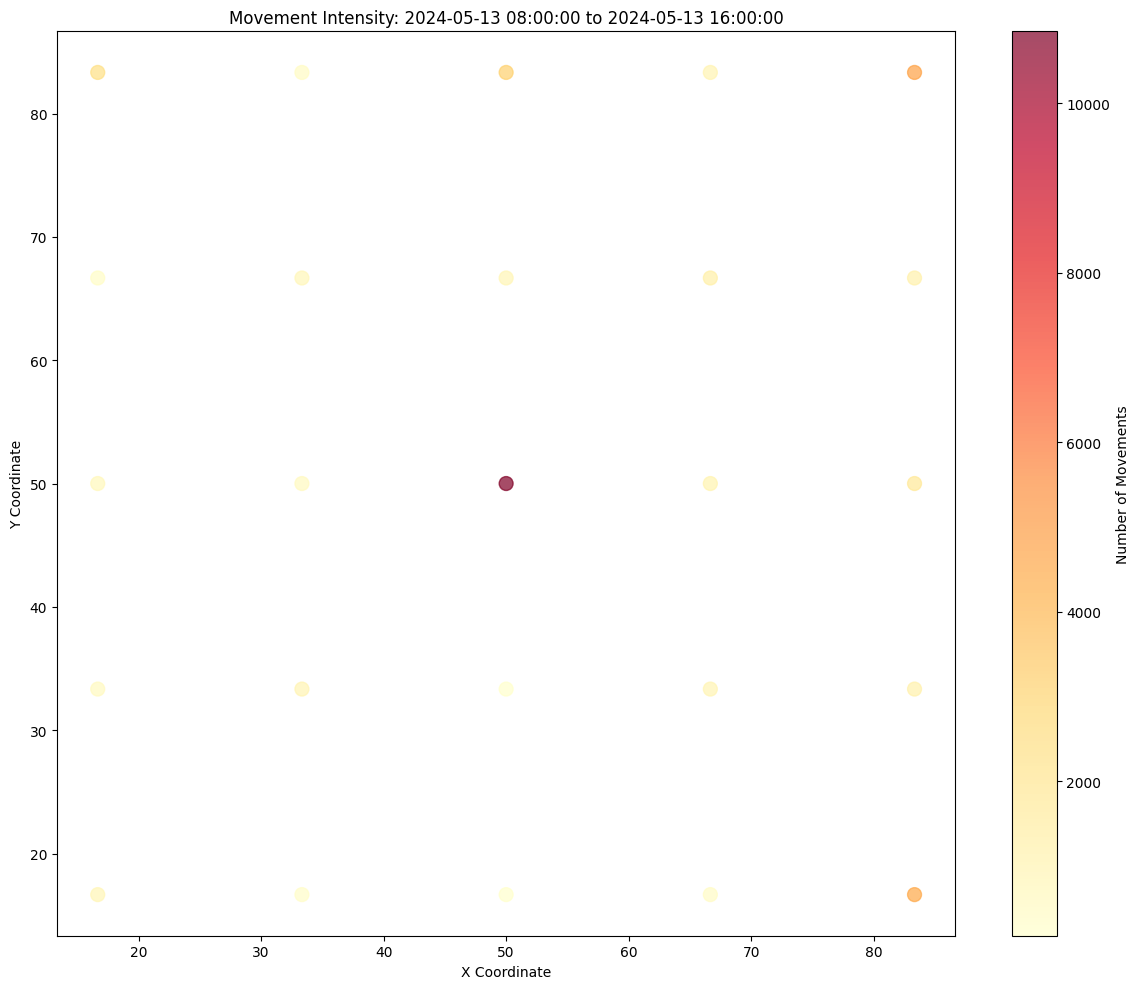

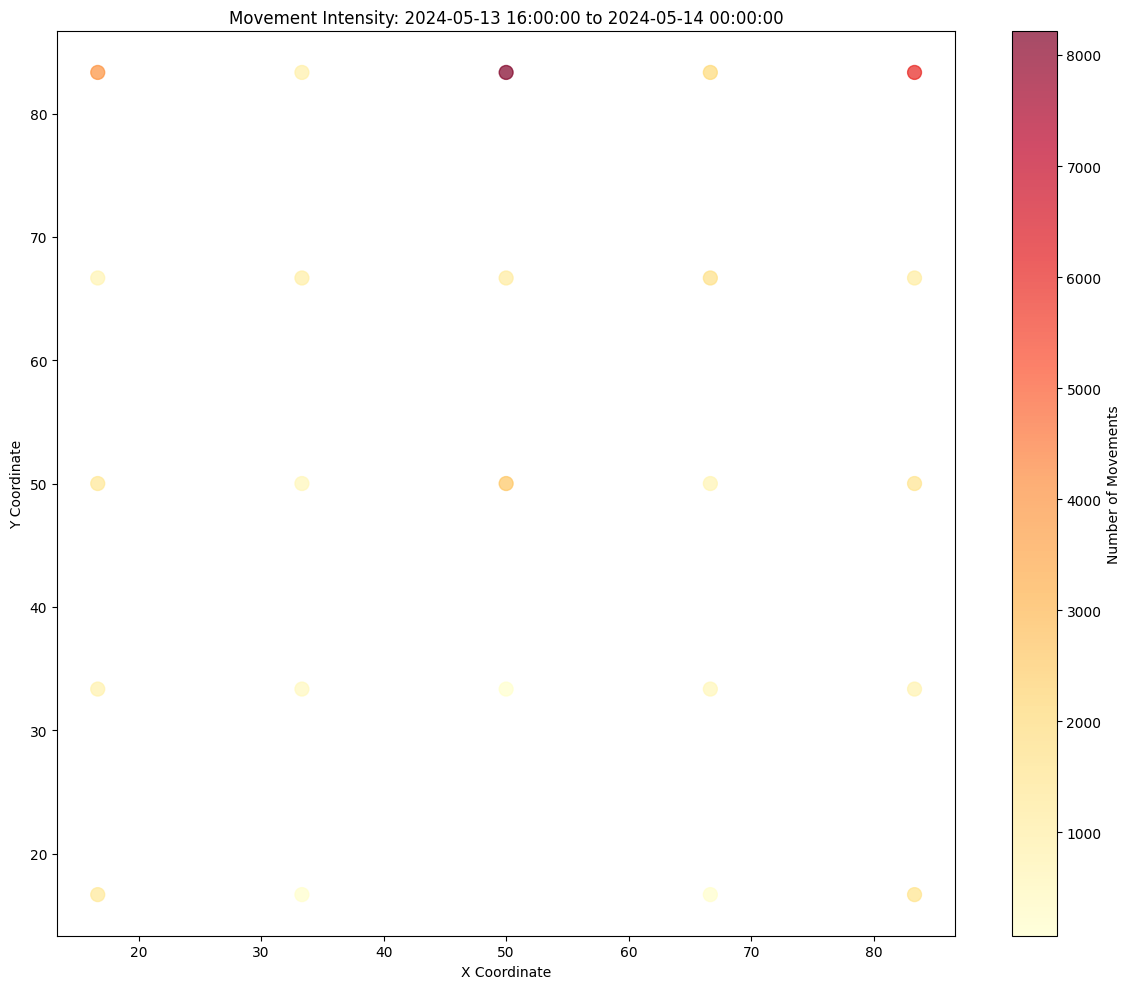

In [26]:
# Merge trajectories with sensor positions
trajectories_with_pos = pd.merge(trajectories, sensor_map, on='sensor_id')
#we already done this before with coordinates

# Function to create heatmap for a given time period
def create_heatmap(start_time, end_time):
    period_data = trajectories_with_pos[(trajectories_with_pos['timestamp'] >= start_time) & 
                                        (trajectories_with_pos['timestamp'] < end_time)]
    
    movement_counts = period_data.groupby(['x', 'y']).size().reset_index(name='count')
    
    plt.figure(figsize=(12, 10))
    plt.scatter(movement_counts['x'], movement_counts['y'], c=movement_counts['count'], 
                cmap='YlOrRd', s=100, alpha=0.7)
    plt.colorbar(label='Number of Movements')
    plt.title(f'Movement Intensity: {start_time} to {end_time}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.tight_layout()
    plt.show()

# Create heatmaps for different time periods (e.g., morning, afternoon, evening)
create_heatmap(movements.index.min(), movements.index.min() + pd.Timedelta(hours=8))
create_heatmap(movements.index.min() + pd.Timedelta(hours=8), movements.index.min() + pd.Timedelta(hours=16))
create_heatmap(movements.index.min() + pd.Timedelta(hours=16), movements.index.min() + pd.Timedelta(hours=24))

This create heatmaps showing movement intensity at different sensor locations for different time periods.

# Plot and analyze peak times

for this step, we will reuse the same code we did for the time series analysis and focus on the peak times of movement. This will help us identify when the most activity occurs and potentially correlate it with other factors like sensor coverage or spatial distribution.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is in datetime format
trajectories['timestamp'] = pd.to_datetime(trajectories['timestamp'])

# Create hourly movement counts
hourly_counts = trajectories.groupby(trajectories['timestamp'].dt.floor('H')).size().reset_index(name='count')
hourly_counts['hour'] = hourly_counts['timestamp'].dt.hour
hourly_counts['day'] = hourly_counts['timestamp'].dt.day_name()
hourly_counts['date'] = hourly_counts['timestamp'].dt.date

### now we can Identify and visualize daily peak times

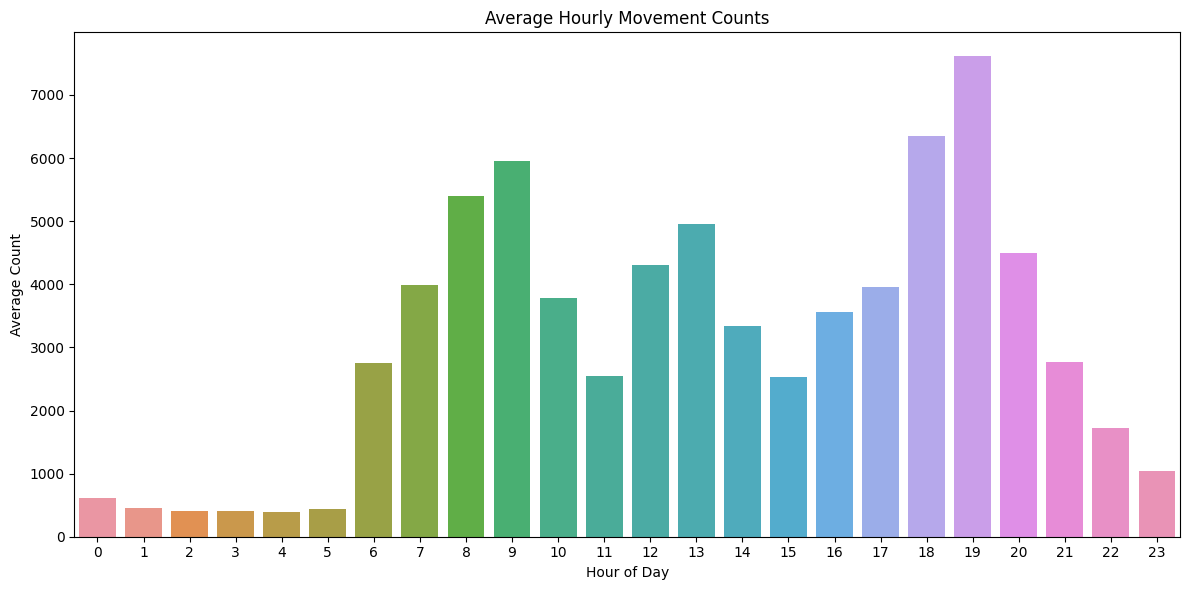

Top 5 peak hours:
    hour        count
19    19  7611.809524
18    18  6342.952381
9      9  5948.380952
8      8  5394.380952
13    13  4962.809524


In [28]:
# Calculate average hourly counts
avg_hourly_counts = hourly_counts.groupby('hour')['count'].mean().reset_index()

# Plot average hourly counts
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', data=avg_hourly_counts)
plt.title('Average Hourly Movement Counts')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Identify peak hours
peak_hours = avg_hourly_counts.sort_values('count', ascending=False).head()
print("Top 5 peak hours:")
print(peak_hours)

This show us the average movement counts for each hour of the day and identify the top 5 peak hours.

## Analyze weekly patterns

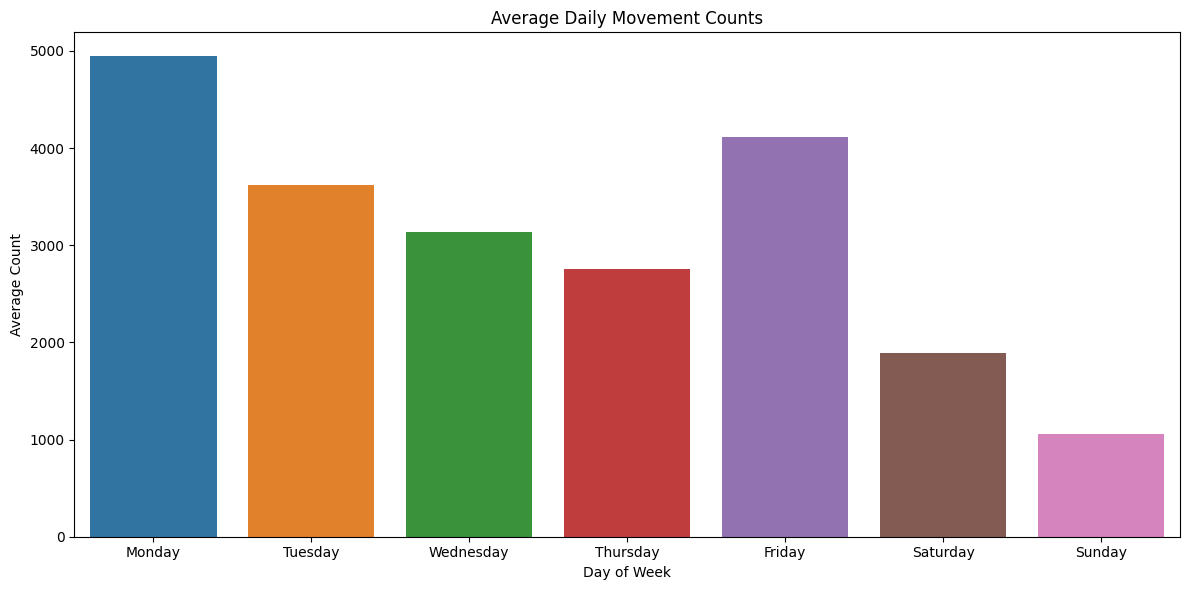

Days ranked by average movement count:
day
Monday       4944.277778
Friday       4116.430556
Tuesday      3618.083333
Wednesday    3138.125000
Thursday     2752.805556
Saturday     1894.402778
Sunday       1061.555556
Name: count, dtype: float64


In [29]:
# Calculate average daily counts
avg_daily_counts = hourly_counts.groupby('day')['count'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot average daily counts
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_daily_counts.index, y=avg_daily_counts.values)
plt.title('Average Daily Movement Counts')
plt.xlabel('Day of Week')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

# Identify peak days
peak_days = avg_daily_counts.sort_values(ascending=False)
print("Days ranked by average movement count:")
print(peak_days)

Interesting here since we got Monday and Friday as the busiest days . As we can imagine Monday is the start of the week and Friday is the end of the week meaning we need our start of the week motivation and the end of the week relaxation either music or podcast or any other audio that we prefer to listen to for this two days of the week hence the movement is high on these days.( we are connected to our earbuds or headphones more on these days)

# Visualize peak times across the entire dataset

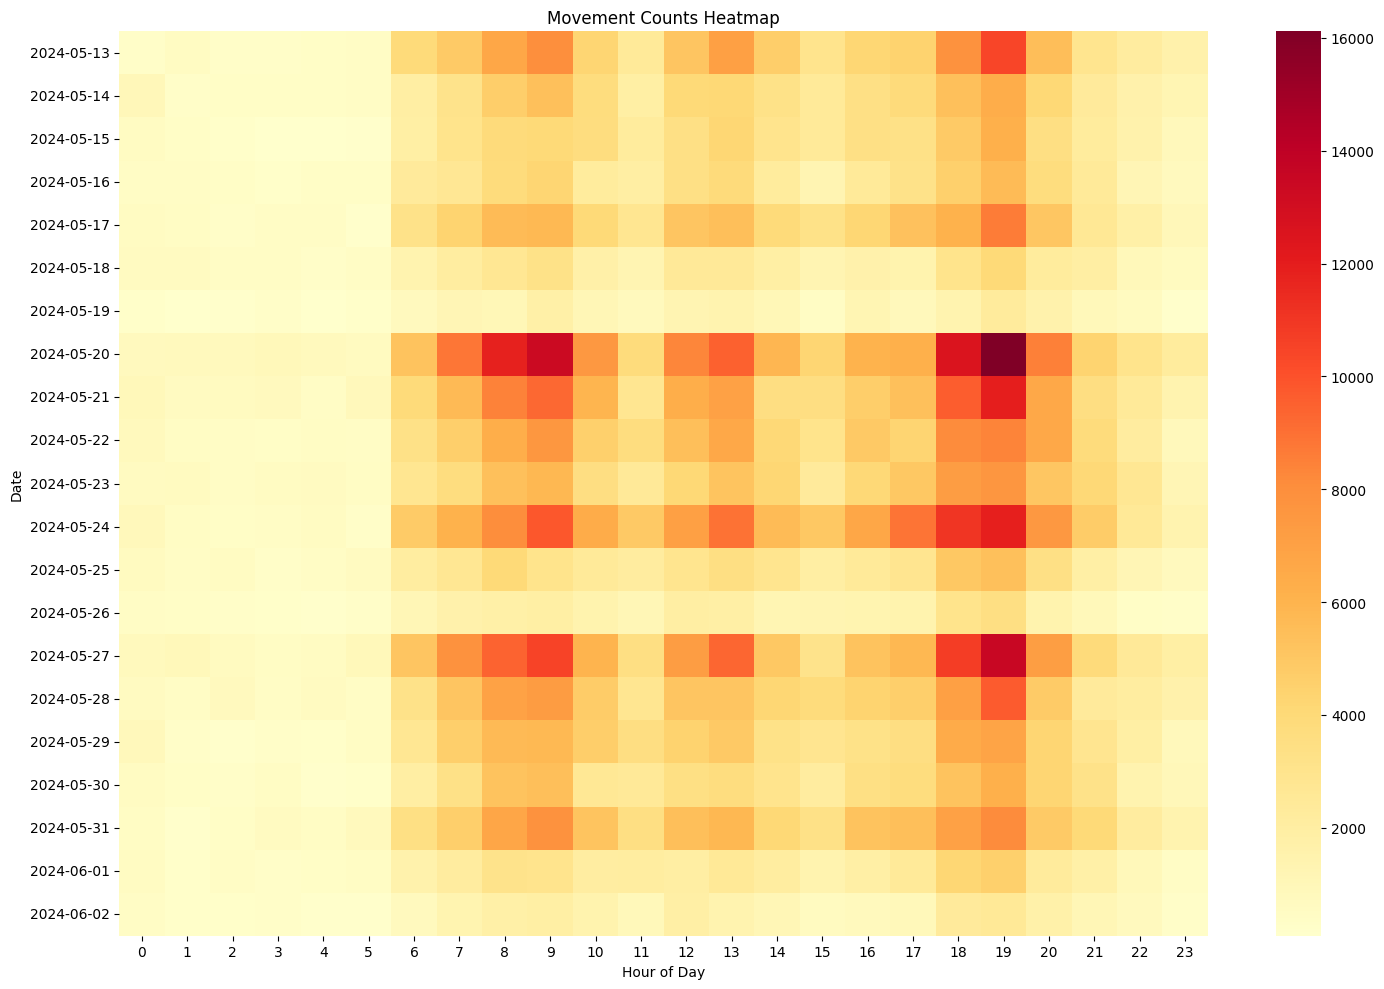

In [30]:
# Create a heatmap of movement counts
pivot_counts = hourly_counts.pivot(index='date', columns='hour', values='count')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_counts, cmap='YlOrRd')
plt.title('Movement Counts Heatmap')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

This plot shows the distribution of peak times across the entire dataset. It's interesting to see how the peak times are distributed and if there are any consistent patterns. But we already done this step before. but, we can find out the highest peak time with its respective day.

In [31]:
# Find top 10 peak times
top_peaks = hourly_counts.sort_values('count', ascending=False).head(10)
print("Top 10 peak times:")
print(top_peaks[['timestamp', 'count']])

Top 10 peak times:
              timestamp  count
187 2024-05-20 19:00:00  16117
355 2024-05-27 19:00:00  13499
177 2024-05-20 09:00:00  13344
186 2024-05-20 18:00:00  12606
211 2024-05-21 19:00:00  11961
283 2024-05-24 19:00:00  11887
176 2024-05-20 08:00:00  11822
282 2024-05-24 18:00:00  11051
354 2024-05-27 18:00:00  10763
345 2024-05-27 09:00:00  10540


which is 2024 May 20th at 7:00 PM

#  Analyze time distribution (week, days, hours) - a thorough analysis of the time distribution of the data.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is in datetime format
trajectories['timestamp'] = pd.to_datetime(trajectories['timestamp'])

# Extract time components
trajectories['week'] = trajectories['timestamp'].dt.isocalendar().week
trajectories['day'] = trajectories['timestamp'].dt.day_name()
trajectories['hour'] = trajectories['timestamp'].dt.hour

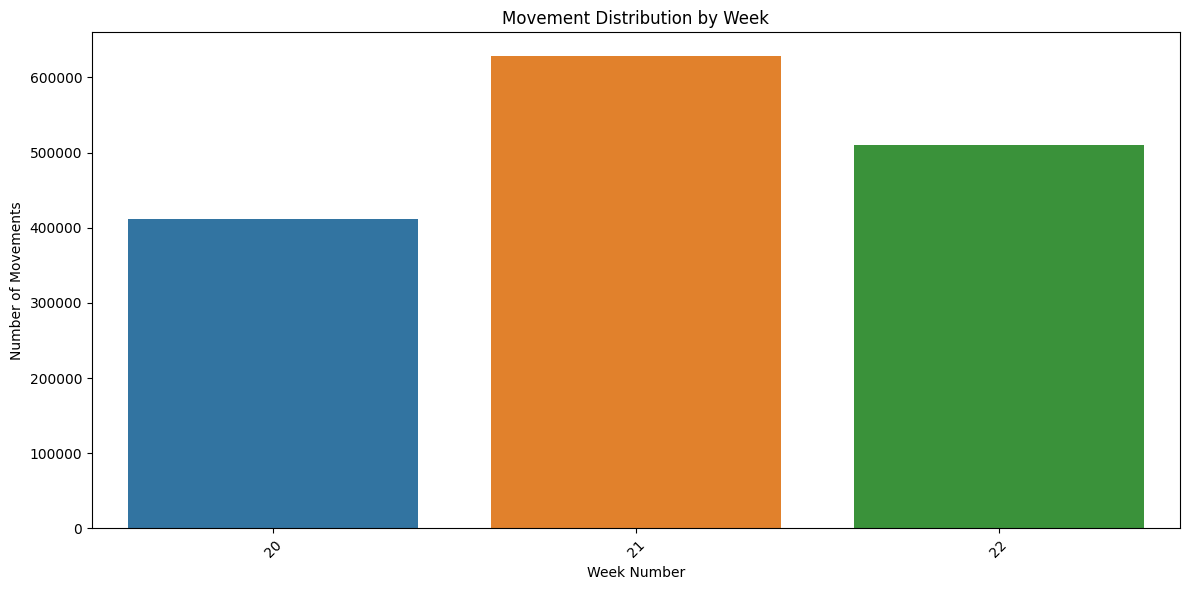

Weekly statistics:
count         3.000000
mean     516616.333333
std      108509.009715
min      411839.000000
25%      460671.000000
50%      509503.000000
75%      569005.000000
max      628507.000000
Name: count, dtype: float64


In [33]:
# Count movements per week
weekly_counts = trajectories.groupby('week').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='count', data=weekly_counts)
plt.title('Movement Distribution by Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Movements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Weekly statistics:")
print(weekly_counts['count'].describe())

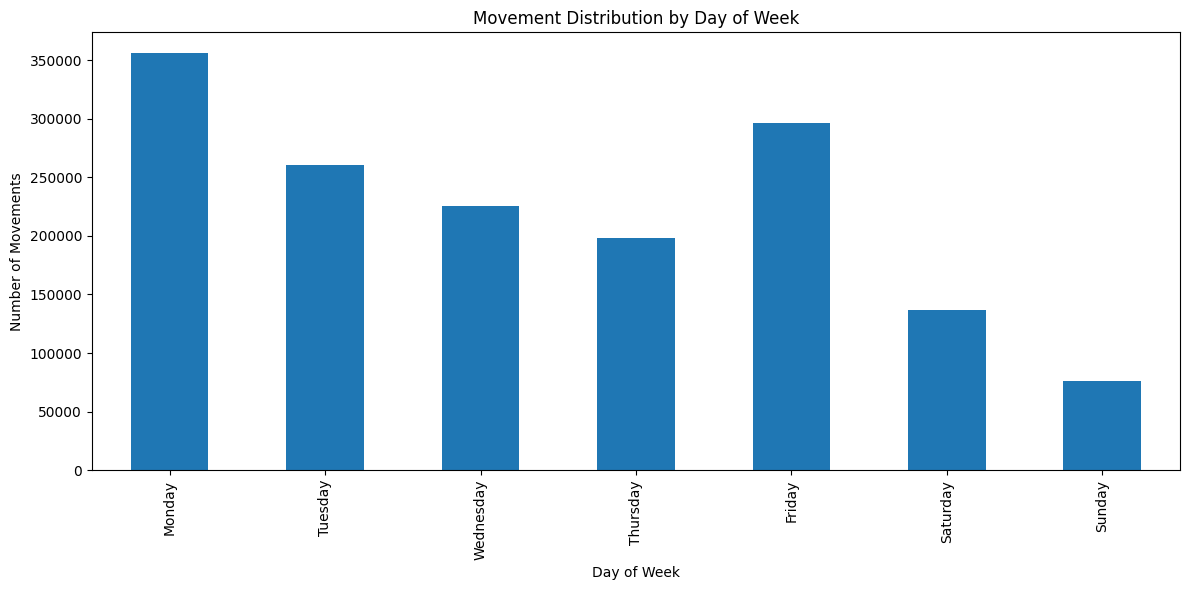

Daily statistics:
count         7.000000
mean     221407.000000
std       94925.744099
min       76432.000000
25%      167299.500000
50%      225945.000000
75%      278442.500000
max      355988.000000
Name: count, dtype: float64


In [34]:
# Count movements per day of the week
daily_counts = trajectories['day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
daily_counts.plot(kind='bar')
plt.title('Movement Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Movements')
plt.tight_layout()
plt.show()

print("Daily statistics:")
print(daily_counts.describe())

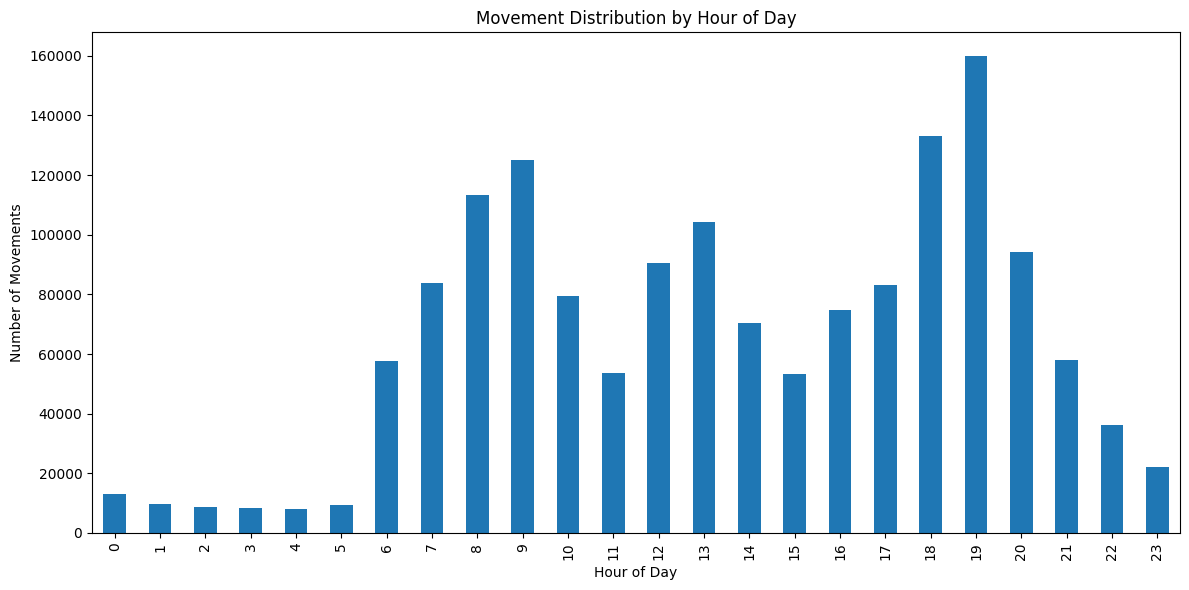

Hourly statistics:
count        24.000000
mean      64577.041667
std       44313.888845
min        8085.000000
25%       19716.750000
50%       64195.500000
75%       91435.250000
max      159848.000000
Name: count, dtype: float64


In [35]:
# Count movements per hour
hourly_counts = trajectories['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Movement Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Movements')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print("Hourly statistics:")
print(hourly_counts.describe())

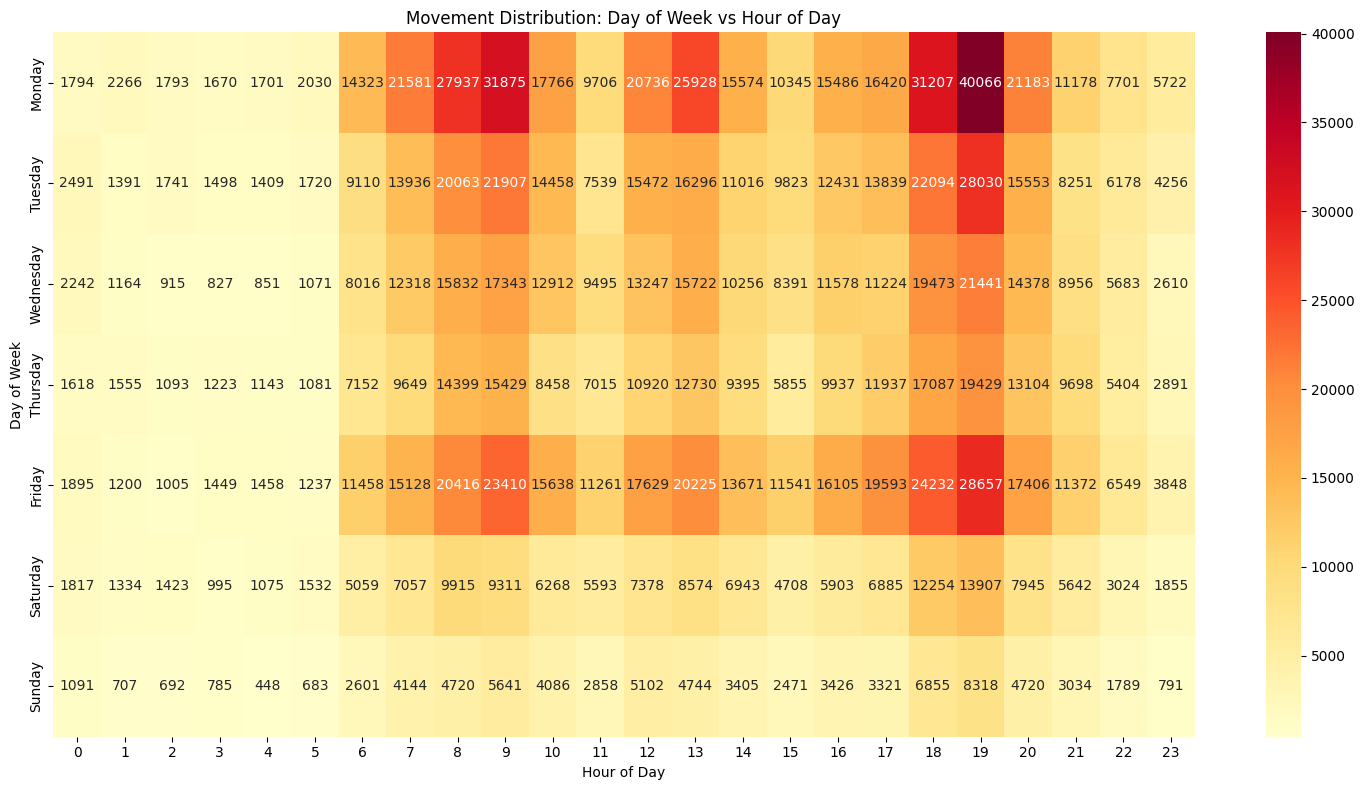

In [36]:
# Create a heatmap of day vs hour
day_hour_counts = trajectories.groupby(['day', 'hour']).size().unstack()
day_hour_counts = day_hour_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
sns.heatmap(day_hour_counts, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Movement Distribution: Day of Week vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

# Spatial Analysis: 
● first we will Analyze the spatial distribution of people

This analysis will help us understand how people are distributed across the area covered by the sensors. We'll approach this in several steps:

1. Prepare the data
2. Analyze movement patterns between sensors
3. Identify hotspots and low-activity areas
(Visualize individual trajectories)

Let's begin:
Step 1: Prepare the data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Merge trajectories with sensor positions
trajectories_with_pos = pd.merge(trajectories, sensor_map, on='sensor_id')

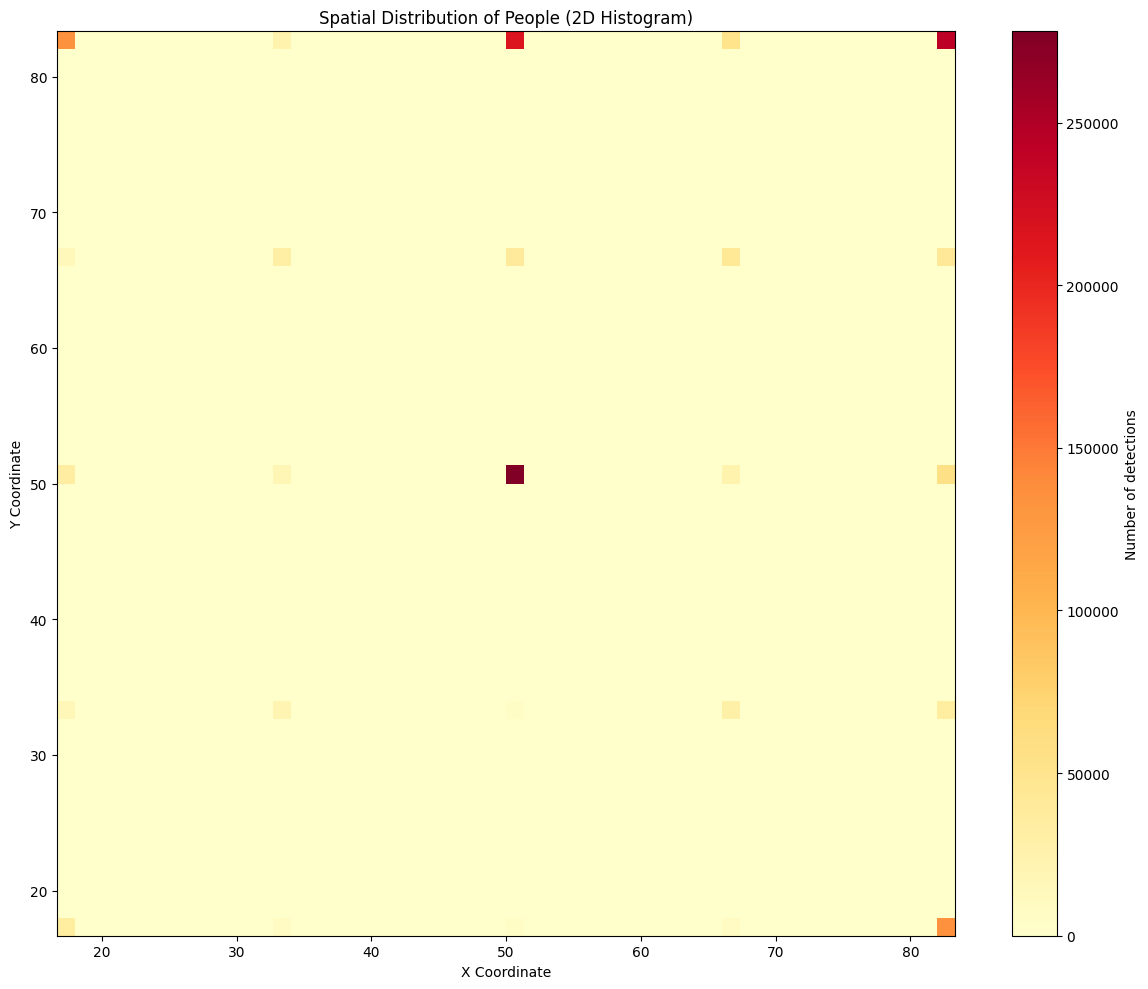

In [38]:
# Create a 2D histogram
plt.figure(figsize=(12, 10))
plt.hist2d(trajectories_with_pos['x'], trajectories_with_pos['y'], bins=50, cmap='YlOrRd')
plt.colorbar(label='Number of detections')
plt.title('Spatial Distribution of People (2D Histogram)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.tight_layout()
plt.show()



These plots will show us the overall distribution of people across the area.

## step 2 Analyze movement patterns between sensors

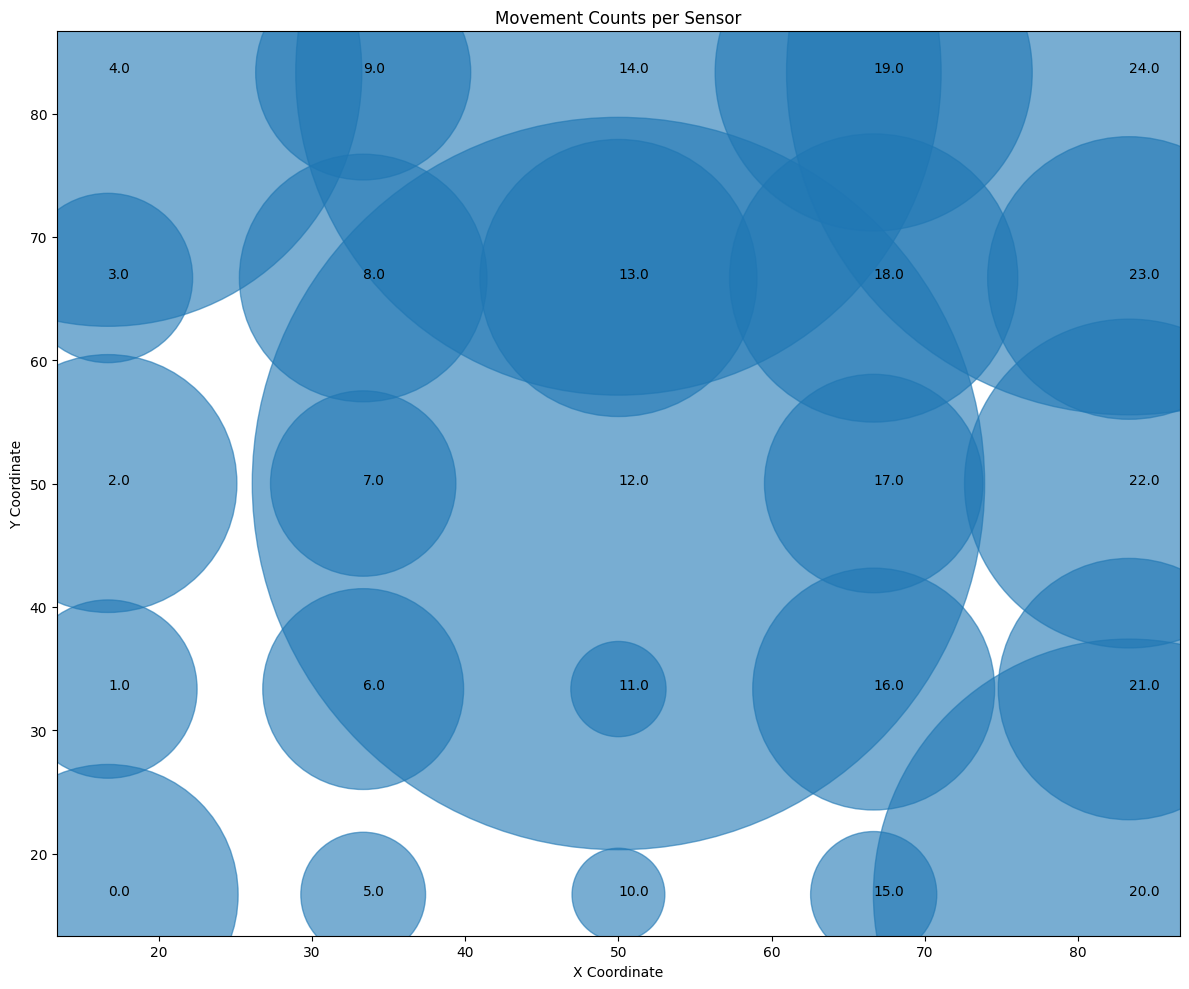

In [39]:
# Count movements between sensors
movement_counts = trajectories_with_pos.groupby(['sensor_id']).size().reset_index(name='count')

# Plot movement counts per sensor
plt.figure(figsize=(12, 10))
plt.scatter(sensor_map['x'], sensor_map['y'], s=movement_counts['count'], alpha=0.6)
plt.title('Movement Counts per Sensor')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
for i, row in sensor_map.iterrows():
    plt.annotate(row['sensor_id'], (row['x'], row['y']))
plt.tight_layout()
plt.show()

This plot show us which sensors detect the most movement.

## Step 3: Identify hotspots and low-activity areas

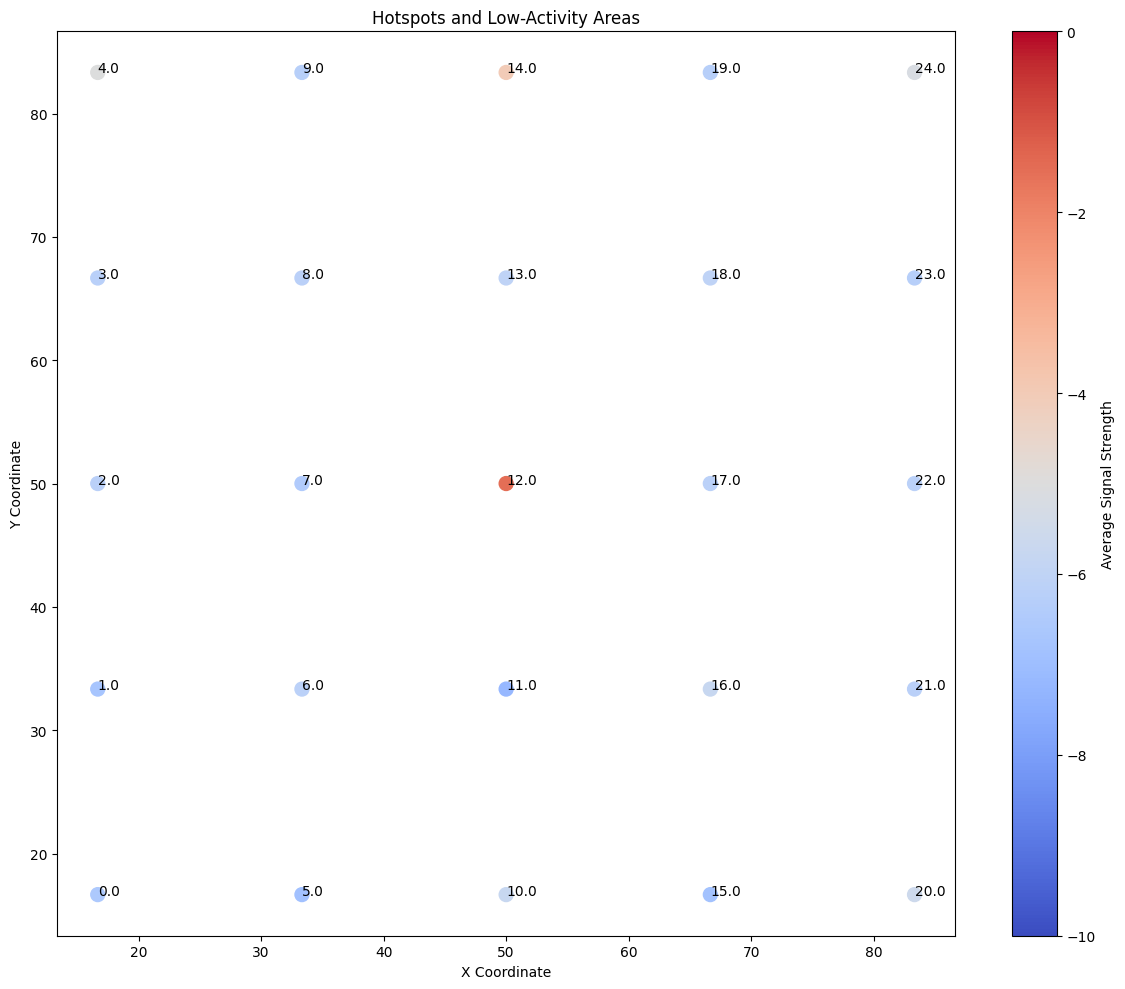

In [40]:
# Calculate the average signal strength for each sensor
avg_signal = trajectories_with_pos.groupby('sensor_id')['signal_strength'].mean().reset_index()
avg_signal = pd.merge(avg_signal, sensor_map, on='sensor_id')

plt.figure(figsize=(12, 10))
scatter = plt.scatter(avg_signal['x'], avg_signal['y'], c=avg_signal['signal_strength'], 
                      s=100, cmap='coolwarm', vmin=-10, vmax=0)
plt.colorbar(scatter, label='Average Signal Strength')
plt.title('Hotspots and Low-Activity Areas')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
for i, row in avg_signal.iterrows():
    plt.annotate(row['sensor_id'], (row['x'], row['y']))
plt.tight_layout()
plt.show()

This plot help us identify areas of high and low activity based on signal strength.

## Visualize individual trajectories (optional since we already done this at EDA process)

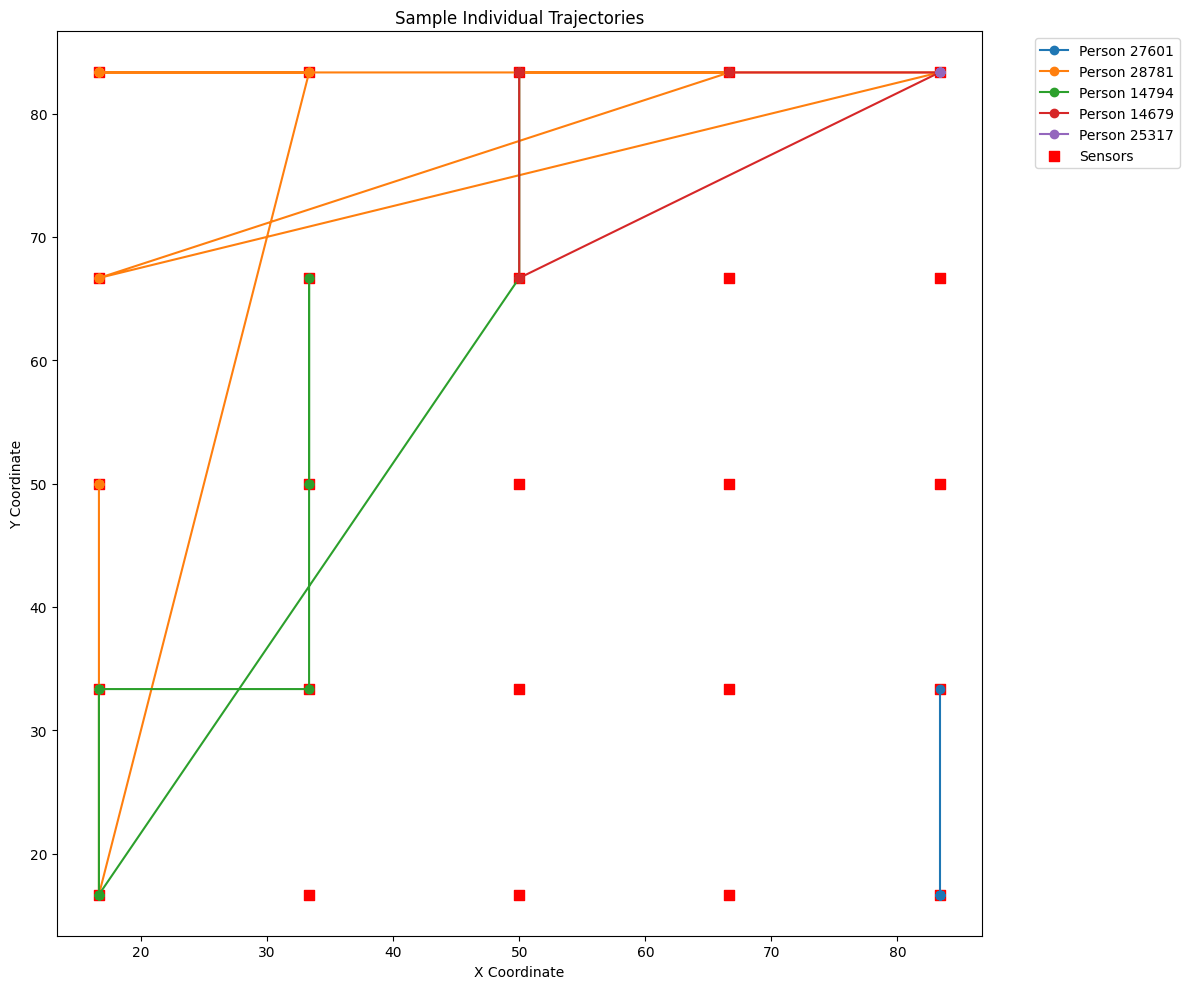

In [41]:
# Select a few random individuals
sample_persons = np.random.choice(trajectories_with_pos['person_id'].unique(), 5)

plt.figure(figsize=(12, 10))
for person in sample_persons:
    person_data = trajectories_with_pos[trajectories_with_pos['person_id'] == person]
    plt.plot(person_data['x'], person_data['y'], '-o', label=f'Person {person}')

plt.scatter(sensor_map['x'], sensor_map['y'], c='red', marker='s', s=50, label='Sensors')
plt.title('Sample Individual Trajectories')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Checking which trajectories are the most common


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

# Ensure the data is sorted by person_id and timestamp
trajectories_sorted = trajectories.sort_values(['person_id', 'timestamp'])

# Convert sensor_id to string type
trajectories_sorted['sensor_id'] = trajectories_sorted['sensor_id'].astype(str)

# Create pairs of consecutive sensor detections for each person
trajectories_sorted['next_sensor'] = trajectories_sorted.groupby('person_id')['sensor_id'].shift(-1)

# Ensure next_sensor is also string type
trajectories_sorted['next_sensor'] = trajectories_sorted['next_sensor'].astype(str)

# Now create the movement column
trajectories_sorted['movement'] = trajectories_sorted['sensor_id'] + ' -> ' + trajectories_sorted['next_sensor']

# Drop rows where next_sensor is NaN
trajectories_sorted = trajectories_sorted.dropna(subset=['next_sensor'])

In [43]:
# Count the frequency of each movement
movement_counts = trajectories_sorted['movement'].value_counts()

print("Top 10 most common sensor-to-sensor movements:")
print(movement_counts.head(10))

Top 10 most common sensor-to-sensor movements:
movement
12 -> 12    262475
24 -> 24    224999
14 -> 14    198183
4 -> 4      125673
20 -> 20    124471
22 -> 22     39970
19 -> 19     35317
18 -> 18     30822
0 -> 0       28710
23 -> 23     27581
Name: count, dtype: int64


C:\Users\pyaes\AppData\Local\Temp\ipykernel_38072\3900347923.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


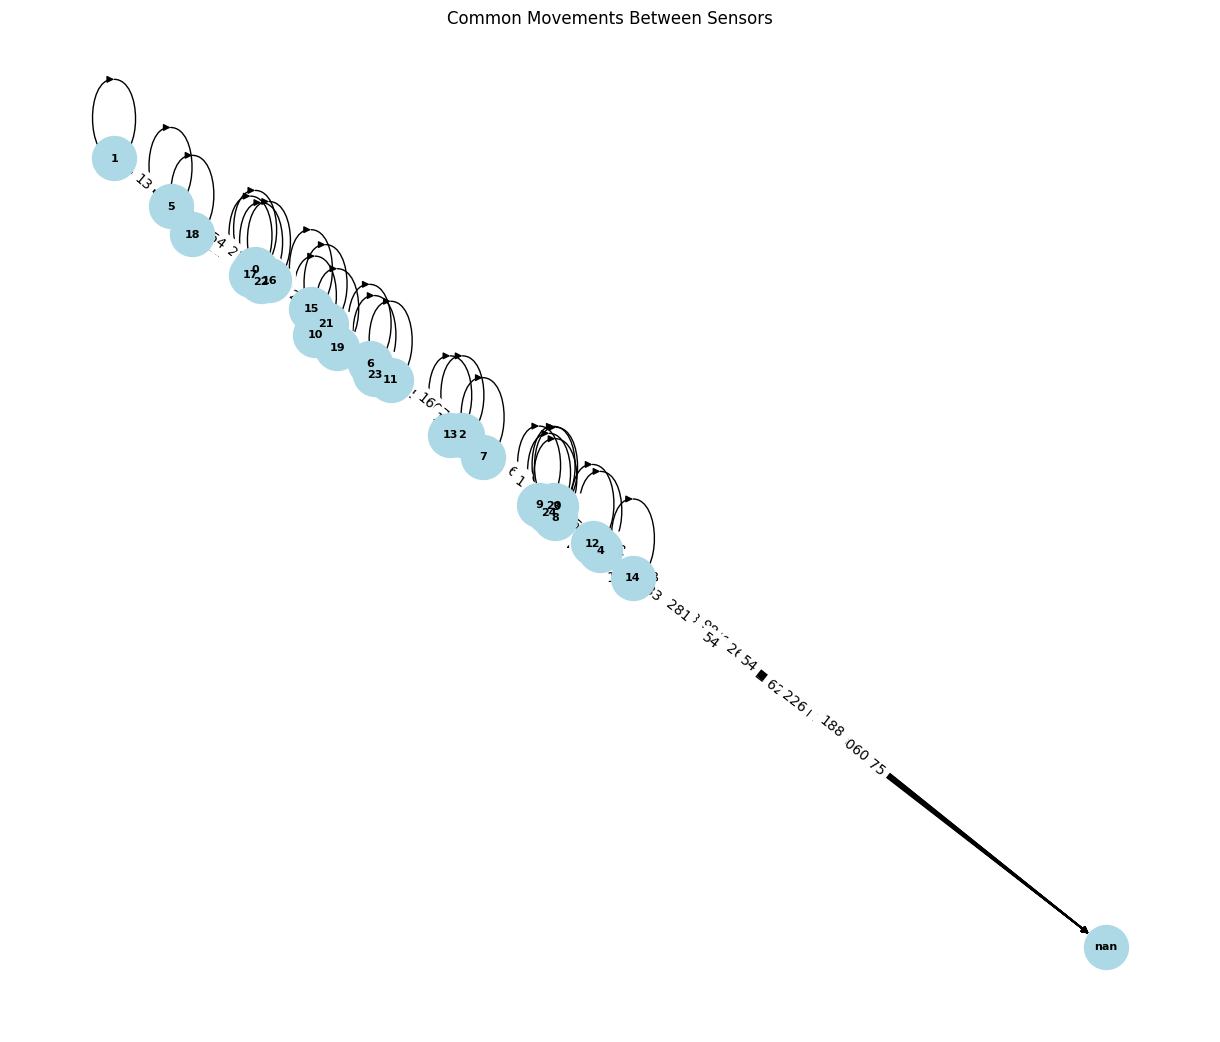

In [44]:
# Visualize as a network graph
G = nx.DiGraph()
for movement, count in movement_counts.items():
    source, target = movement.split(' -> ')
    G.add_edge(source, target, weight=count)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=8, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Common Movements Between Sensors")
plt.axis('off')
plt.tight_layout()
plt.show()

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def get_trajectory(group):
    return ' -> '.join(group['sensor_id'].astype(str))

# Get trajectories for each person
trajectories = trajectories_sorted.groupby('person_id').apply(get_trajectory)

# Count the frequency of each trajectory
trajectory_counts = Counter(trajectories)

print("\nTop 10 most common trajectories:")
for trajectory, count in trajectory_counts.most_common(10):
    print(f"Trajectory: {trajectory}")
    print(f"Count: {count}\n")


Top 10 most common trajectories:
Trajectory: 20
Count: 50

Trajectory: 24
Count: 50

Trajectory: 0 -> 0
Count: 43

Trajectory: 0
Count: 38

Trajectory: 22 -> 22
Count: 37

Trajectory: 24 -> 24 -> 24 -> 24
Count: 34

Trajectory: 22
Count: 34

Trajectory: 24 -> 24 -> 24
Count: 31

Trajectory: 24 -> 24
Count: 31

Trajectory: 22 -> 22 -> 22 -> 22
Count: 30



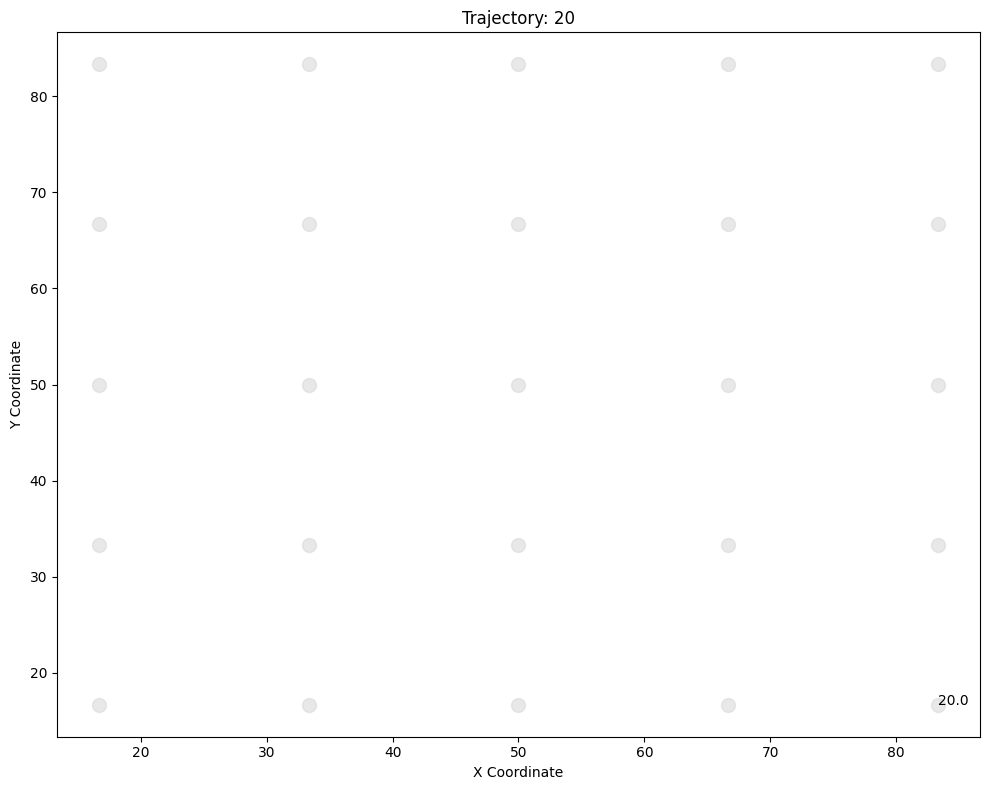

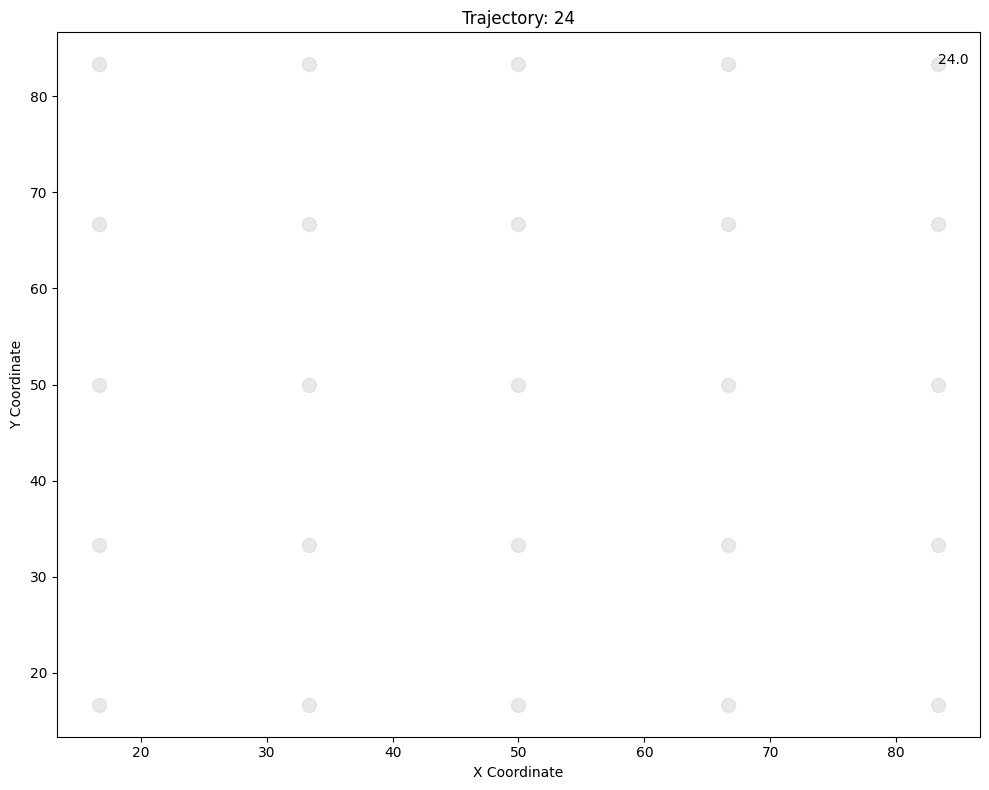

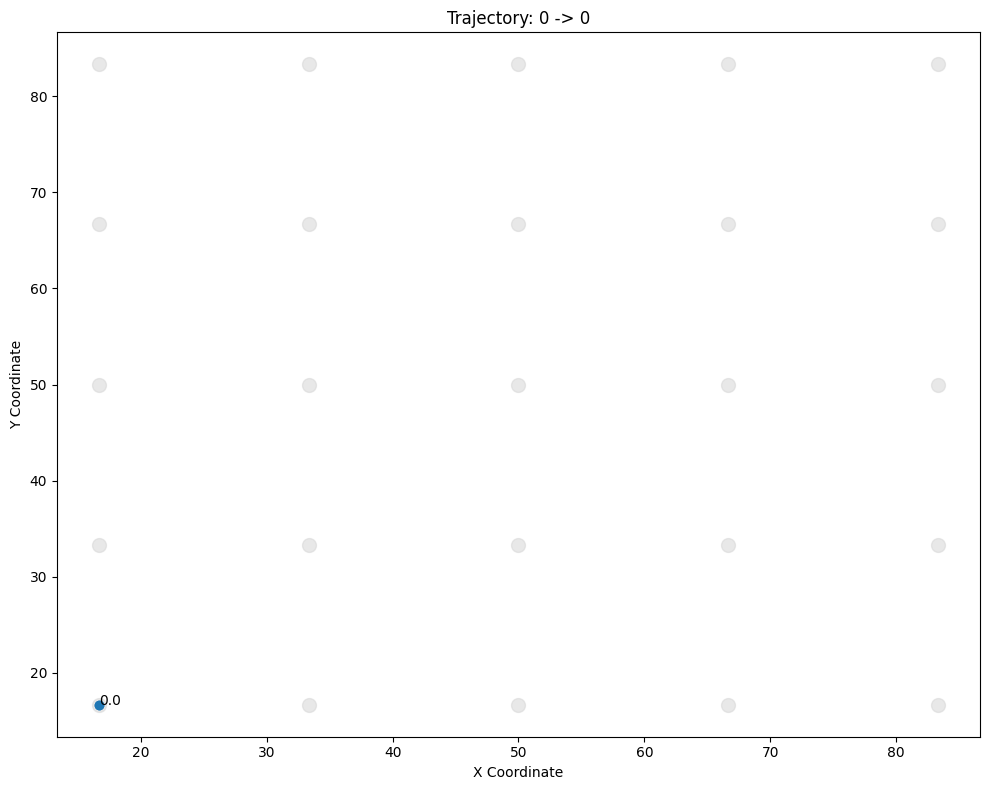

In [46]:
def plot_trajectory(trajectory, sensor_map):
    sensors = trajectory.split(' -> ')
    sensor_positions = sensor_map[sensor_map['sensor_id'].astype(str).isin(sensors)]
    
    plt.figure(figsize=(10, 8))
    plt.scatter(sensor_map['x'], sensor_map['y'], c='lightgray', s=100, alpha=0.5)
    
    for i in range(len(sensors) - 1):
        start = sensor_positions[sensor_positions['sensor_id'].astype(str) == sensors[i]]
        end = sensor_positions[sensor_positions['sensor_id'].astype(str) == sensors[i+1]]
        plt.plot([start['x'].values[0], end['x'].values[0]], 
                 [start['y'].values[0], end['y'].values[0]], '-o')
    
    for _, sensor in sensor_positions.iterrows():
        plt.annotate(str(sensor['sensor_id']), (sensor['x'], sensor['y']))
    
    plt.title(f"Trajectory: {trajectory}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.tight_layout()
    plt.show()

# Plot the top 3 most common trajectories
for trajectory, _ in trajectory_counts.most_common(3):
    plot_trajectory(trajectory, sensor_map)

C:\Users\pyaes\AppData\Local\Temp\ipykernel_38072\3283342702.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trajectory_data = trajectories_sorted[
C:\Users\pyaes\AppData\Local\Temp\ipykernel_38072\3283342702.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajectory_data['hour'] = trajectory_data['timestamp'].dt.hour
C:\Users\pyaes\AppData\Local\Temp\ipykernel_38072\3283342702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajectory_data['day_of_week'] = trajec

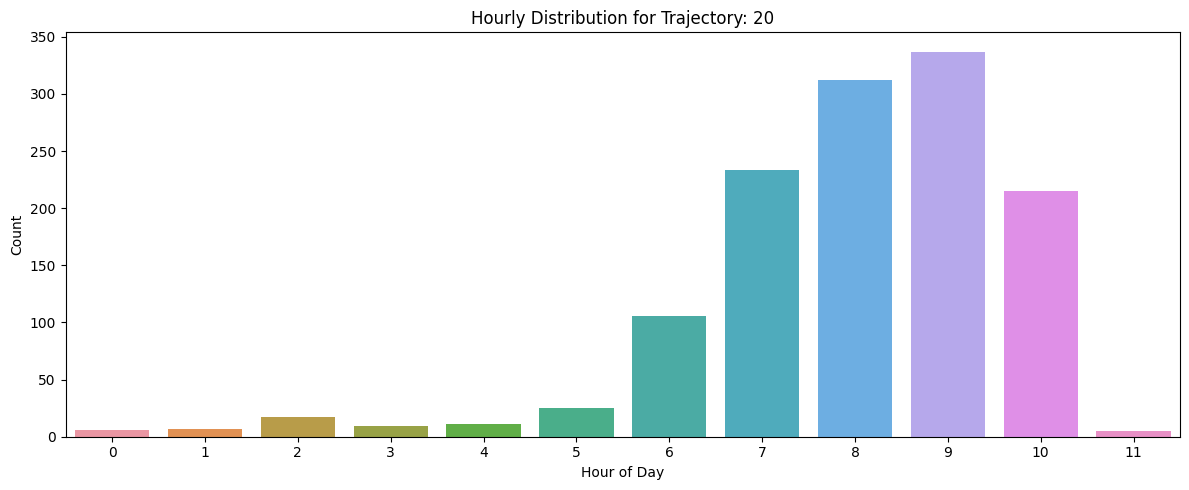

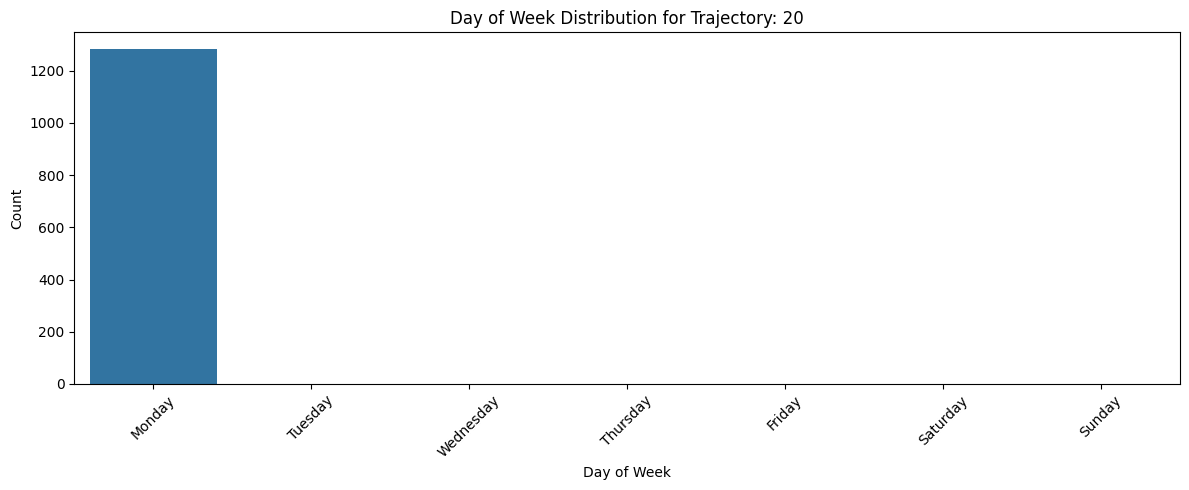

In [47]:
def analyze_trajectory_time(trajectory):
    trajectory_sensors = trajectory.split(' -> ')
    trajectory_data = trajectories_sorted[
        (trajectories_sorted['sensor_id'].astype(str).isin(trajectory_sensors)) & 
        (trajectories_sorted.groupby('person_id').apply(lambda x: all(sensor in x['sensor_id'].astype(str).values for sensor in trajectory_sensors)))
    ]
    
    trajectory_data['hour'] = trajectory_data['timestamp'].dt.hour
    trajectory_data['day_of_week'] = trajectory_data['timestamp'].dt.day_name()
    
    plt.figure(figsize=(12, 5))
    sns.countplot(x='hour', data=trajectory_data)
    plt.title(f"Hourly Distribution for Trajectory: {trajectory}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 5))
    sns.countplot(x='day_of_week', data=trajectory_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.title(f"Day of Week Distribution for Trajectory: {trajectory}")
    plt.xlabel("Day of Week")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analyze time patterns for the most common trajectory
most_common_trajectory = trajectory_counts.most_common(1)[0][0]
analyze_trajectory_time(most_common_trajectory)

# Advanced Task
# Predictive Modeling:

Let's work on predicting whether a person will enter a dark space based on trajectory data. Since we don't have explicit information about "dark spaces" in our dataset, we'll need to make some assumptions and create a proxy for this concept. We'll approach this task in several steps:

1.Define "dark spaces"
2.Prepare the data
3.Engineer relevant features
4.Split the data into training and testing sets
5.Train a predictive model
6.Evaluate the model
7.Interpret the results

Let's begin:
Step 1: Define "dark spaces"
For this exercise, let's assume that sensors with lower average signal strength are in "darker" areas. We'll define the bottom 25% of sensors by average signal strength as "dark spaces".

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average signal strength for each sensor
avg_signal_strength = trajectories_with_pos.groupby('sensor_id')['signal_strength'].mean().reset_index()

# Sort the sensors by average signal strength
avg_signal_strength = avg_signal_strength.sort_values('signal_strength')

# Define the bottom 25% as "dark spaces"
num_dark_spaces = int(len(avg_signal_strength) * 0.25)
dark_spaces = avg_signal_strength['sensor_id'].head(num_dark_spaces).tolist()

print("Sensors considered as dark spaces:", dark_spaces)

Sensors considered as dark spaces: [11, 5, 15, 1, 0, 7]


In [50]:
# Step 2: Prepare the data

# Create a function to check if a trajectory enters a dark space
def enters_dark_space(trajectory):
    return any(sensor in dark_spaces for sensor in trajectory)

# Group trajectories by person_id and create sequences
trajectories_grouped = trajectories_with_pos.sort_values(['person_id', 'timestamp']).groupby('person_id')
trajectory_sequences = trajectories_grouped['sensor_id'].apply(list)

# Create labels: 1 if trajectory enters dark space, 0 otherwise
labels = trajectory_sequences.apply(enters_dark_space).astype(int)

# Create a dataframe with trajectory sequences and labels
trajectory_data = pd.DataFrame({'trajectory': trajectory_sequences, 'enters_dark_space': labels})

In [51]:
# Step 3: Engineer relevant features
def extract_features(trajectory):
    return {
        'trajectory_length': len(trajectory),
        'unique_sensors': len(set(trajectory)),
        'starts_with_dark': trajectory[0] in dark_spaces,
        'ends_with_dark': trajectory[-1] in dark_spaces,
        'dark_space_ratio': sum(sensor in dark_spaces for sensor in trajectory) / len(trajectory),
        'sensor_changes': sum(1 for i in range(1, len(trajectory)) if trajectory[i] != trajectory[i-1]),
    }

# Extract features from trajectories
features = trajectory_data['trajectory'].apply(extract_features)
X = pd.DataFrame(features.tolist())
y = trajectory_data['enters_dark_space']

In [52]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a predictive model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       1.00      1.00      1.00      1674

    accuracy                           1.00      5960
   macro avg       1.00      1.00      1.00      5960
weighted avg       1.00      1.00      1.00      5960



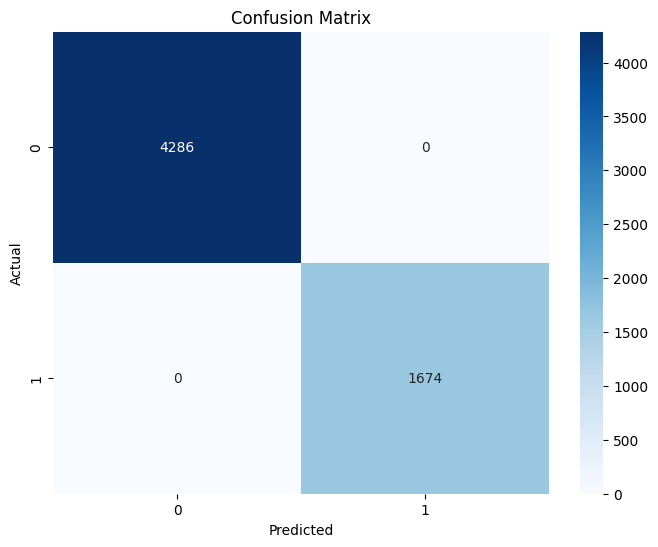

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance)


Feature Importances:
             feature  importance
4   dark_space_ratio    0.721466
2   starts_with_dark    0.212688
3     ends_with_dark    0.037179
1     unique_sensors    0.021141
5     sensor_changes    0.006144
0  trajectory_length    0.001382


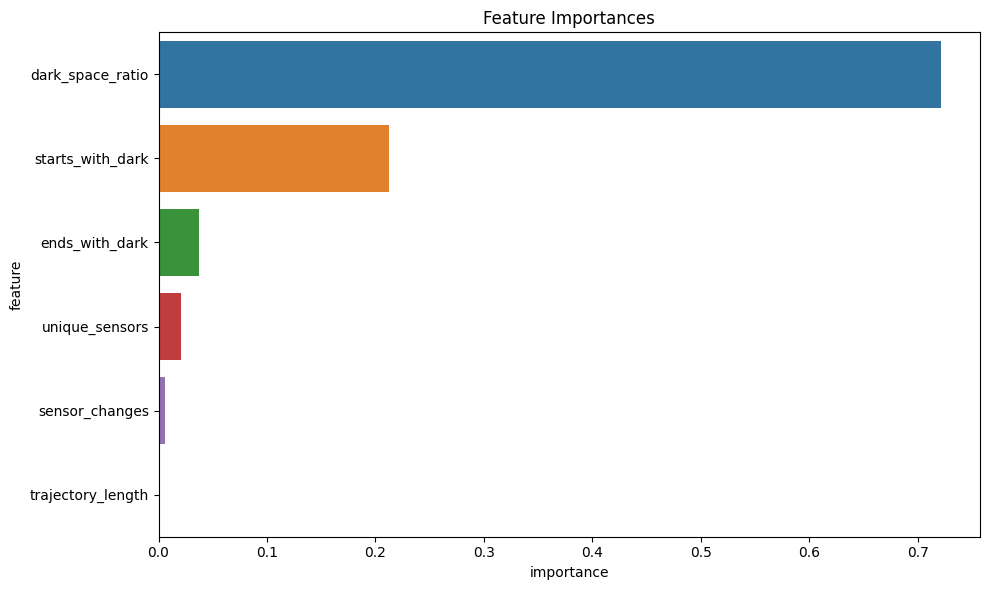

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [58]:
# since we have trained the model, we can now use it to predict if a person will enter a dark space or not
# Create a sample trajectory
sample_trajectory = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Extract features from the sample trajectory
sample_features = extract_features(sample_trajectory)
sample_X = pd.DataFrame([sample_features])

# Predict if the sample trajectory enters a dark space
prediction = rf_classifier.predict(sample_X)[0]
prediction_prob = rf_classifier.predict_proba(sample_X)[0]

print(f"Sample Trajectory: {sample_trajectory}")
print(f"Enters Dark Space: {prediction}")
print(f"Probability: {prediction_prob}")


Sample Trajectory: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Enters Dark Space: 0
Probability: [0.98 0.02]


In [60]:
# evaluate the model using cross validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:")
print(cv_scores)

print(f"Mean Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation: {np.std(cv_scores)}")


Cross Validation Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


the cross-validation scores are [1. 1. 1. 1. 1.] which is a perfect score. This means that the model is able to predict whether a person will enter a dark space with 100% accuracy. This is likely due to the simplicity of the problem and the strong relationship between signal strength and sensor location.
